<a href="https://colab.research.google.com/github/RajuGodavarthy/UCBMLAI-Incident-Resolution-Time-Prediction/blob/main/Incident_Resolution_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict Incident Closure Time Using Machine Learning**

**Objective:**

The primary objective is to predict the estimated closure time of an incident (in hours or days) from its creation, based on the attributes collected from multiple incident stages.

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


**Load Data**

**Source:** UCI Machine Learning Repository

This is an event log of an incident management process extracted from data gathered from the audit system of an instance of the ServiceNowTM platform used by an IT company. The event log is enriched with data loaded from a relational database underlying a corresponding process-aware information system


In [4]:
# Mounting Google drive to upload the data file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load data from google drive
data = pd.read_csv('/content/drive/MyDrive/UCB-PCMLAI/data/incident_event_log.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

**Data Analysis - Understaning the data and performing data clean up**

In [7]:
data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [8]:
data.shape

(141712, 36)

In [9]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [10]:
data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [11]:
# verify missing values
data.isnull().sum()

,0
number,0
incident_state,0
active,0
reassignment_count,0
reopen_count,0
sys_mod_count,0
made_sla,0
caller_id,0
opened_by,0
opened_at,0


**Identify values with '?'**

**Verify any Duplicate data in the dataset**

In [12]:
data[data.duplicated()]
# No duplicate values

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at


In [13]:
# validate the data values with '?'
# Initialize an empty dictionary to store counts of rows with '?' for each column
question_mark_counts = {}

# Loop through each column in the DataFrame
for col in data.columns:
    # Count rows where the column contains '?'
    count = (data[col] == '?').sum()
    # Store the count in the dictionary with the column name as the key
    question_mark_counts[col] = count

# Display the counts of rows with '?' for each column
print("Count of rows where each column contains '?':")
for col, count in question_mark_counts.items():
    print(f"Column '{col}': {count} rows contain '?'")

Count of rows where each column contains '?':
Column 'number': 0 rows contain '?'
Column 'incident_state': 0 rows contain '?'
Column 'active': 0 rows contain '?'
Column 'reassignment_count': 0 rows contain '?'
Column 'reopen_count': 0 rows contain '?'
Column 'sys_mod_count': 0 rows contain '?'
Column 'made_sla': 0 rows contain '?'
Column 'caller_id': 29 rows contain '?'
Column 'opened_by': 4835 rows contain '?'
Column 'opened_at': 0 rows contain '?'
Column 'sys_created_by': 53076 rows contain '?'
Column 'sys_created_at': 53076 rows contain '?'
Column 'sys_updated_by': 0 rows contain '?'
Column 'sys_updated_at': 0 rows contain '?'
Column 'contact_type': 0 rows contain '?'
Column 'location': 76 rows contain '?'
Column 'category': 78 rows contain '?'
Column 'subcategory': 111 rows contain '?'
Column 'u_symptom': 32964 rows contain '?'
Column 'cmdb_ci': 141267 rows contain '?'
Column 'impact': 0 rows contain '?'
Column 'urgency': 0 rows contain '?'
Column 'priority': 0 rows contain '?'
Col

In [14]:
# calculate % of the missing data values with '?' and calculate %

# Initialize an empty dictionary to store counts of rows with '?' for each column
question_mark_pct = {}

# Loop through each column in the DataFrame
for col in data.columns:
    # Count rows where the column contains '?'
    count_pct = (data[col] == '?').sum()/data.shape[0]*100
    # Store the count in the dictionary with the column name as the key
    question_mark_pct[col] = count_pct

# Convert the dictionary to a DataFrame
question_mark_df = pd.DataFrame(list(question_mark_pct.items()), columns=['Column', 'Percentage'])

# Sort the DataFrame by the 'Percentage' column in descending order
sorted_question_mark_df = question_mark_df.sort_values(by='Percentage', ascending=False)

# Display the sorted DataFrame
print("Percentage of rows where each column contains '?' (sorted by descending order):")
print(sorted_question_mark_df)



Percentage of rows where each column contains '?' (sorted by descending order):
                     Column  Percentage
31                caused_by   99.983770
30                   vendor   99.827820
19                  cmdb_ci   99.685983
29                      rfc   99.300694
28               problem_id   98.380518
10           sys_created_by   37.453427
11           sys_created_at   37.453427
18                u_symptom   23.261262
24              assigned_to   19.402732
23         assignment_group   10.029496
8                 opened_by    3.411849
34              resolved_at    2.216467
32              closed_code    0.503839
33              resolved_by    0.159478
17              subcategory    0.078328
16                 category    0.055041
15                 location    0.053630
7                 caller_id    0.020464
1            incident_state    0.000000
0                    number    0.000000
3        reassignment_count    0.000000
2                    active    0.000000


In [15]:
# Drop the below attributes, as majority of the values are missing in those attributes
# caused_by, vendor, cmdb_ci, rfc,  problem_id

data.drop(['caused_by', 'vendor', 'cmdb_ci', 'rfc', 'problem_id'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [16]:
# Identify unique incident numbers
incidents = len(data.number.unique())
print(incidents)

24918


In [17]:
# Validate the incident_state attribute
incident_state_counts = data['incident_state'].value_counts()
print(incident_state_counts)

incident_state
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: count, dtype: int64


In [18]:
# Exclude invalid incident state value '-100'
data=data[data.incident_state!='-100']

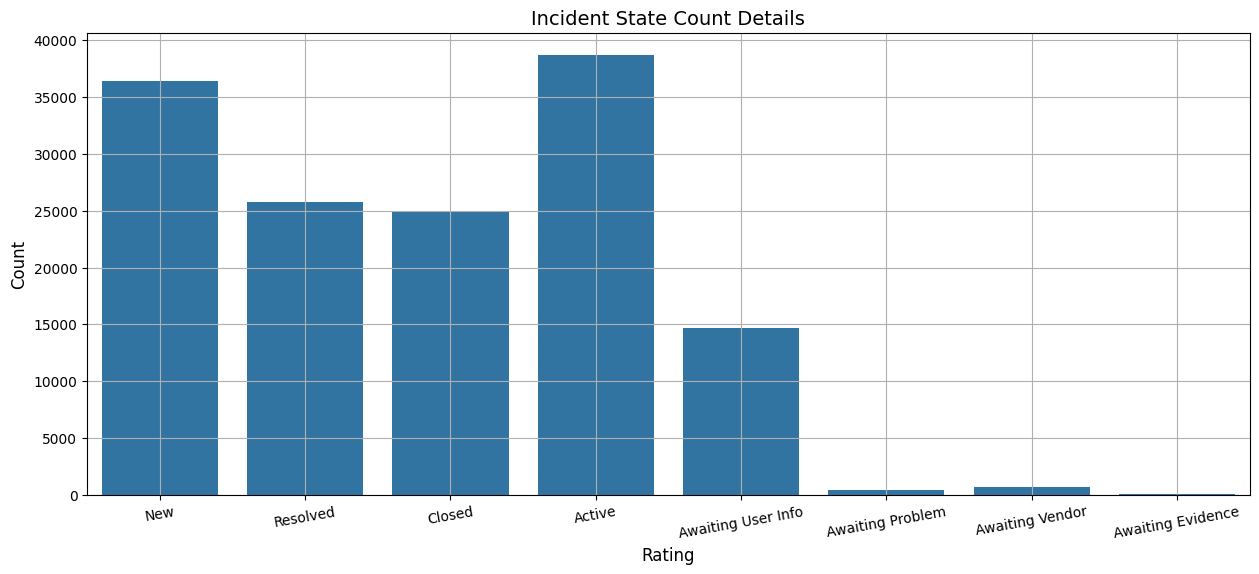

In [19]:
# Visualize Incident State
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='incident_state', data=data, ax=ax)
plt.title("Incident State Count Details", size = 14)
plt.xlabel("Rating", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=10)
plt.grid()
plt.show()

In [20]:
# validate attribute 'active', which is status of the incident
active_counts = data['active'].value_counts()
print(active_counts)

active
True     116721
False     24986
Name: count, dtype: int64


Majority of the incidents shows as open

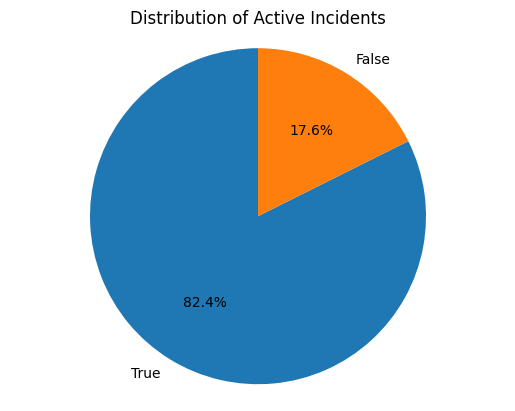

In [21]:
# visualize instance status

labels = ['True', 'False']

# Create pie chart
plt.pie(active_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of Active Incidents')

# Ensure circle shape
plt.axis('equal')

# Display the chart
plt.show()

In [22]:
# Validate the reassignment_count attribute
incident_reassignment_counts = data['reassignment_count'].value_counts()
print(incident_reassignment_counts)

reassignment_count
0     69874
1     37101
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
18       13
16       13
22        9
19        8
21        3
27        3
23        2
26        2
25        1
24        1
Name: count, dtype: int64


Majority of the incidents has been resolved by the group/support analysts that were assigned initially.

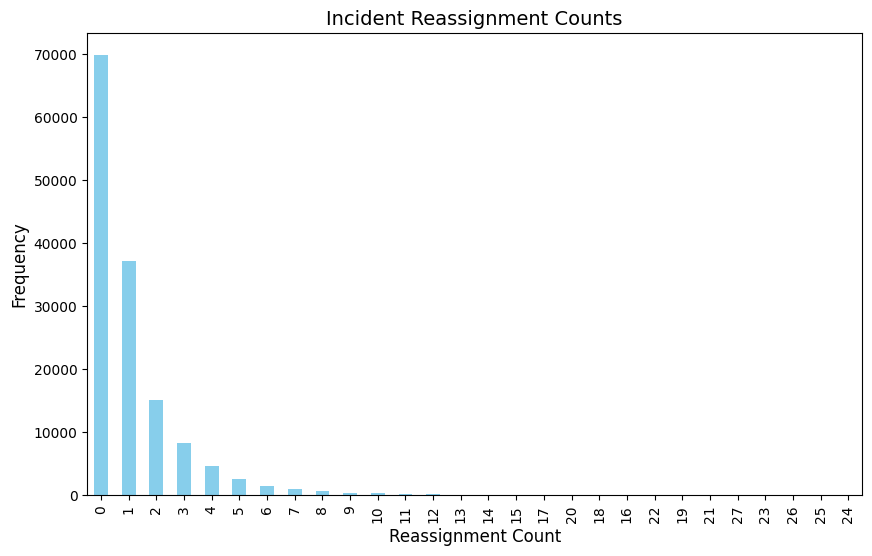

In [23]:
# Plotting "reassignment counts"

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
incident_reassignment_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Incident Reassignment Counts', fontsize=14)
plt.xlabel('Reassignment Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [24]:
# Validate "reopen_count" : number of times the incident resolution was rejected by the caller
incident_reopen_counts = data['reopen_count'].value_counts()
print(incident_reopen_counts)

reopen_count
0    139393
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: count, dtype: int64


Most of the Incidents were resolved successfully, without any rejection of re-opening by the caller

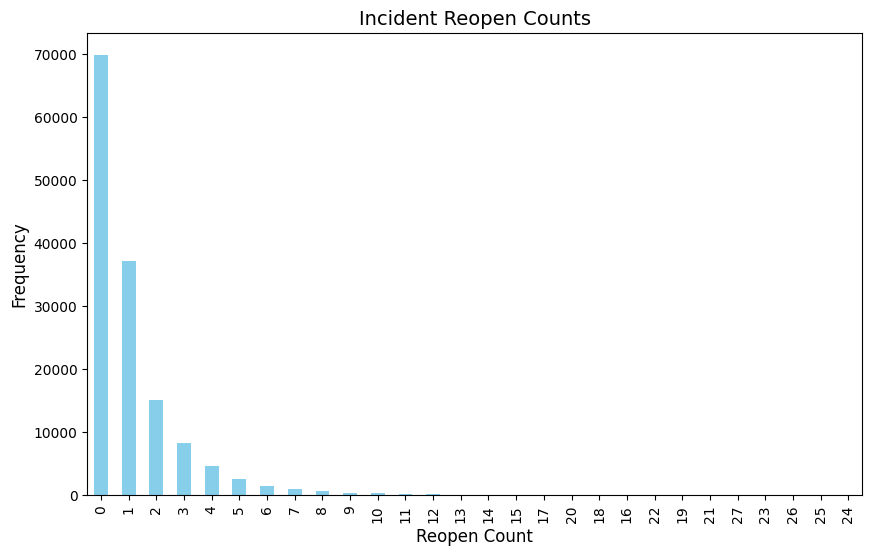

In [25]:
 # visuallize reopen_count attribute
 # Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
incident_reassignment_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Incident Reopen Counts', fontsize=14)
plt.xlabel('Reopen Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [26]:
# verify the attribute	sys_mod_count: number of incident updates until that moment
sys_mod_count_counts = data['sys_mod_count'].value_counts()
print(sys_mod_count_counts)

sys_mod_count
0      24913
1      22061
2      19748
3      14168
4      10735
       ...  
129        1
119        1
106        1
105        1
112        1
Name: count, Length: 115, dtype: int64


In [27]:
# validate the attribute made_sla: that shows whether the incident exceeded the target SLA
made_sla_counts = data['made_sla'].value_counts()
print(made_sla_counts)

print(f"Percentage of Incidents with SLA missed{len(data[data.made_sla==False]['number'].unique())/len(data.number.unique())*100} %")

made_sla
True     132492
False      9215
Name: count, dtype: int64
Percentage of Incidents with SLA missed36.579982342082026 %


Most of the Incidents met SLAs, only ~ 36% of the Incidents missed the SLAs

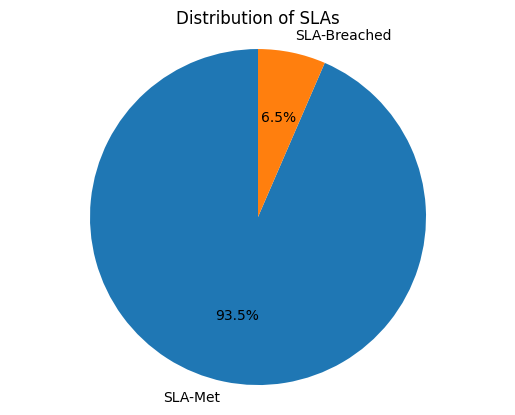

In [28]:
# visualization of made_sla attribute

labels = ['SLA-Met', 'SLA-Breached']

# Create pie chart
plt.pie(made_sla_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of SLAs')

# Ensure circle shape
plt.axis('equal')

# Display the chart
plt.show()


In [29]:
# validate the 'caller_id' - identifier of the user affected
caller_id_counts = data['caller_id'].value_counts()
print(caller_id_counts)

caller_id
Caller 1904    1425
Caller 290      789
Caller 4514     716
Caller 1441     322
Caller 298      293
               ... 
Caller 1283       2
Caller 4301       2
Caller 498        2
Caller 1230       2
Caller 1333       2
Name: count, Length: 5245, dtype: int64


In [ ]:
len(data.caller_id.unique())

In [30]:
# drop the caller_id feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['caller_id'],axis=1,inplace=True)

In [31]:
# validate the attribute 'opened_by' - identifier of the user who reported the incident

opened_by_counts = data['opened_by'].value_counts()
print(opened_by_counts)
print (len(data.opened_by.unique()))

opened_by
Opened by  17     41463
Opened by  24      8063
Opened by  131     7269
Opened by  108     6121
Opened by  55      5655
                  ...  
Opened by  160        3
Opened by  447        3
Opened by  150        3
Opened by  7          3
Opened by  211        3
Name: count, Length: 208, dtype: int64
208


In [32]:
# drop the opened_by feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['opened_by'],axis=1,inplace=True)

In [33]:
# validate opened_at: incident user opening date and time

# Convert time-related columns to datetime
data['opened_at'] = pd.to_datetime(data['opened_at'])

# Group by year and count the occurrences
opened_at_year_counts = data['opened_at'].dt.year.value_counts().sort_index()

# Display the grouped data by year
print("Incident counts grouped by year from 'opened_at':")
print(opened_at_year_counts)

Incident counts grouped by year from 'opened_at':
opened_at
2016    140878
2017       829
Name: count, dtype: int64


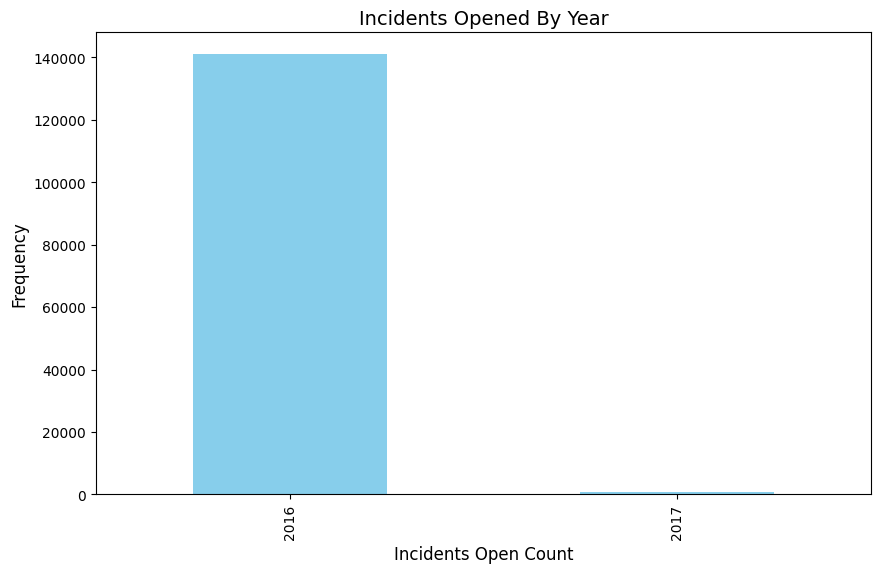

In [34]:
 # Plot Incidents Open by year
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
opened_at_year_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Incidents Opened By Year', fontsize=14)
plt.xlabel('Incidents Open Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [35]:
# validate the attribute - sys_created_by: identifier of the user who registered the incident
sys_created_by_counts = data['sys_created_by'].value_counts()
print(sys_created_by_counts)
print (len(data.sys_created_by.unique()))


sys_created_by
?                 53076
Created by 10     24220
Created by 13      4511
Created by 62      3943
Created by 52      3551
                  ...  
Created by 209        3
Created by 60         3
Created by 191        3
Created by 175        3
Created by 194        3
Name: count, Length: 186, dtype: int64
186


In [36]:
# drop the sys_created_by feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['sys_created_by'],axis=1,inplace=True)

In [37]:
# validate the attribute - sys_created_at: incident system creation date and time
sys_created_at_counts = data['sys_created_at'].value_counts()
print(sys_created_at_counts)
print (len(data.sys_created_at.unique()))


sys_created_at
?                  53076
4/7/2016 14:50        56
15/3/2016 15:19       52
19/4/2016 11:32       47
24/5/2016 09:14       47
                   ...  
21/4/2016 05:14        2
24/4/2016 00:46        2
24/4/2016 07:23        2
22/4/2016 14:04        2
20/4/2016 15:29        2
Name: count, Length: 11553, dtype: int64
11553


In [38]:
# Drop the attribute sys_created_at, at it captures the same time stamp as opened_at attribute
# opened_at attribute will be used to predict the closure time

data.drop(['sys_created_at'],axis=1,inplace=True)


In [39]:
# validate the attribute sys_updated_by: identifier of the user who updated the incident and generated the current log record
sys_updated_by_counts = data['sys_updated_by'].value_counts()
print(sys_updated_by_counts)
print (len(data.sys_updated_by.unique()))


sys_updated_by
Updated by 908    36162
Updated by 44     12644
Updated by 60      7009
Updated by 429     4169
Updated by 859     2560
                  ...  
Updated by 323        1
Updated by 827        1
Updated by 923        1
Updated by 192        1
Updated by 850        1
Name: count, Length: 845, dtype: int64
845


In [40]:
# drop the sys_updated_by feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['sys_updated_by'],axis=1,inplace=True)

In [41]:
# validate the attribute -	sys_updated_at: incident system update date and time

sys_updated_at_counts = data['sys_updated_at'].value_counts()
print(sys_updated_at_counts)
print (len(data.sys_updated_at.unique()))


sys_updated_at
24/3/2016 18:40    420
24/3/2016 19:00    405
24/3/2016 18:51    400
24/3/2016 19:01    393
24/3/2016 18:41    386
                  ... 
9/2/2017 19:03       1
9/2/2017 20:02       1
15/2/2017 10:00      1
10/2/2017 02:15      1
10/2/2017 05:07      1
Name: count, Length: 50660, dtype: int64
50660


In [42]:
# validate the attribute - contact_type: categorical attribute that shows by what means the incident was reported
contact_type_counts = data['contact_type'].value_counts()
print(contact_type_counts)

contact_type
Phone             140457
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: count, dtype: int64


Most of the customers contacted through the phone

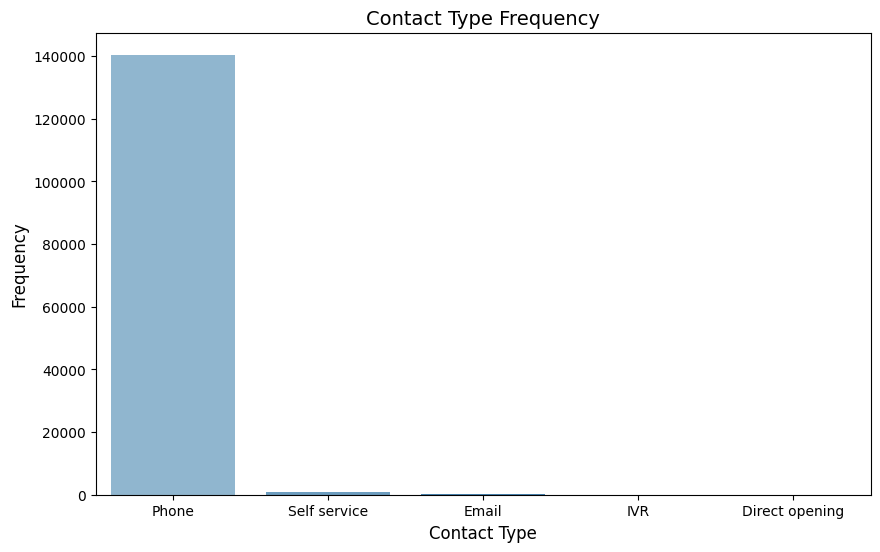

In [43]:
# Plot Contact Type attribute values

# Convert to a DataFrame
contact_type_df = pd.DataFrame(contact_type_counts)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='contact_type', y='count', data=contact_type_df, palette='Blues_d')

# Add title and labels
plt.title('Contact Type Frequency', fontsize=14)
plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()


In [44]:
# validate the attribute - location: identifier of the location of the place affected
location_counts = data['location'].value_counts()
print(location_counts)

location
Location 204    31690
Location 161    22605
Location 143    19245
Location 108    12623
Location 93     11554
                ...  
Location 211        3
Location 181        3
Location 166        2
Location 31         2
Location 132        2
Name: count, Length: 225, dtype: int64


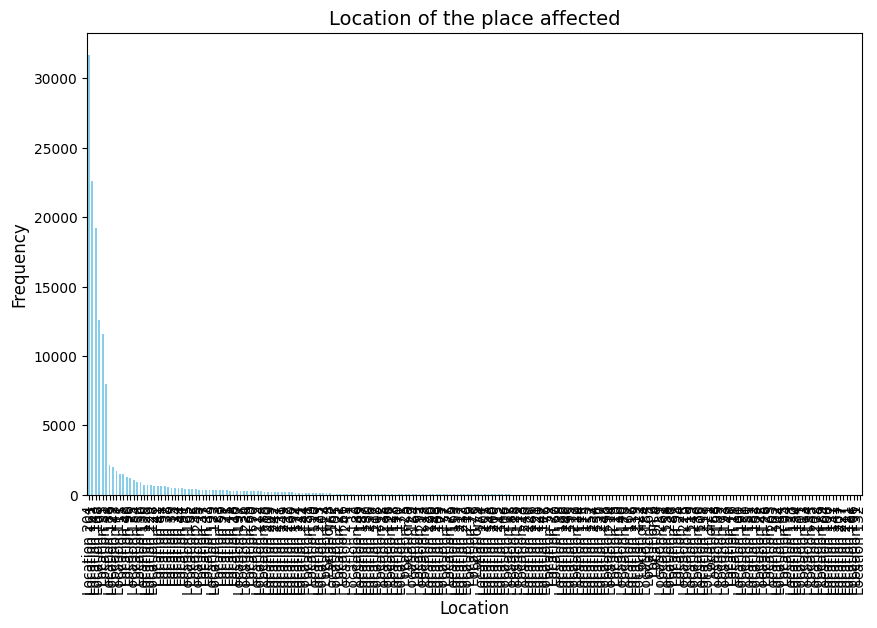

In [45]:
# plot location attribute
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
location_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Location of the place affected', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [46]:
# validate the attribute - category: first-level description of the affected service
category_counts = data['category'].value_counts()
print(category_counts)

category
Category 26    18453
Category 42    15977
Category 53    15968
Category 46    13321
Category 23     7779
Category 9      7365
Category 32     7273
Category 37     6584
Category 57     6532
Category 20     5506
Category 61     5168
Category 24     4561
Category 34     3946
Category 40     3760
Category 45     3619
Category 51     2390
Category 28     2254
Category 35     2037
Category 44     1798
Category 19     1592
Category 13      994
Category 43      858
Category 55      801
Category 17      512
Category 22      420
Category 56      322
Category 38      290
Category 8       264
Category 7       207
Category 33      160
Category 54      139
Category 50       93
Category 31       92
?                 78
Category 63       78
Category 2        77
Category 21       69
Category 47       50
Category 59       42
Category 41       36
Category 29       32
Category 5        31
Category 25       30
Category 62       25
Category 10       24
Category 4        22
Category 52       16
Cate

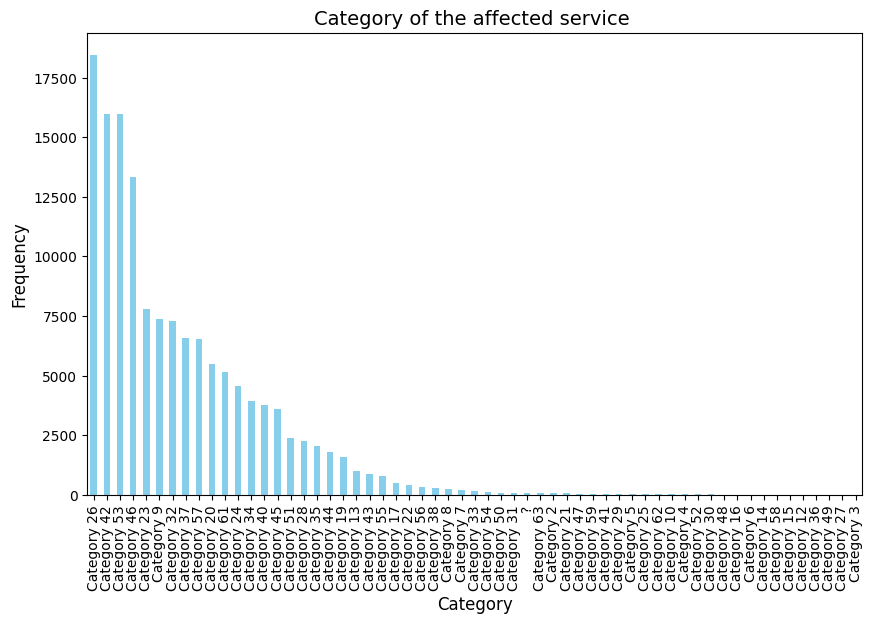

In [47]:
# visualize
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
category_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Category of the affected service ', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


In [48]:
# validate the attribute - subcategory: second-level description of the affected service (related to the first level description, i.e., to category)
subcategory_counts = data['subcategory'].value_counts()
print(subcategory_counts)


subcategory
Subcategory 174    35783
Subcategory 223    15598
Subcategory 175    10496
Subcategory 164     7880
Subcategory 9       4124
                   ...  
Subcategory 8          2
Subcategory 284        1
Subcategory 179        1
Subcategory 241        1
Subcategory 264        1
Name: count, Length: 255, dtype: int64


In [49]:
#  validate the attribute -	u_symptom: description of the user perception about service availability
u_symptom_counts = data['u_symptom'].value_counts()
print(u_symptom_counts)

u_symptom
Symptom 491    51985
?              32959
Symptom 534     5559
Symptom 387     2583
Symptom 4       2532
               ...  
Symptom 364        1
Symptom 441        1
Symptom 313        1
Symptom 103        1
Symptom 576        1
Name: count, Length: 526, dtype: int64


In [50]:
# drop the u_symptom feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['u_symptom'],axis=1,inplace=True)

In [51]:
# validate the attribute - 	impact: description of the impact caused by the incident
impact_counts = data['impact'].value_counts()
print(impact_counts)

impact
2 - Medium    134330
3 - Low         3886
1 - High        3491
Name: count, dtype: int64


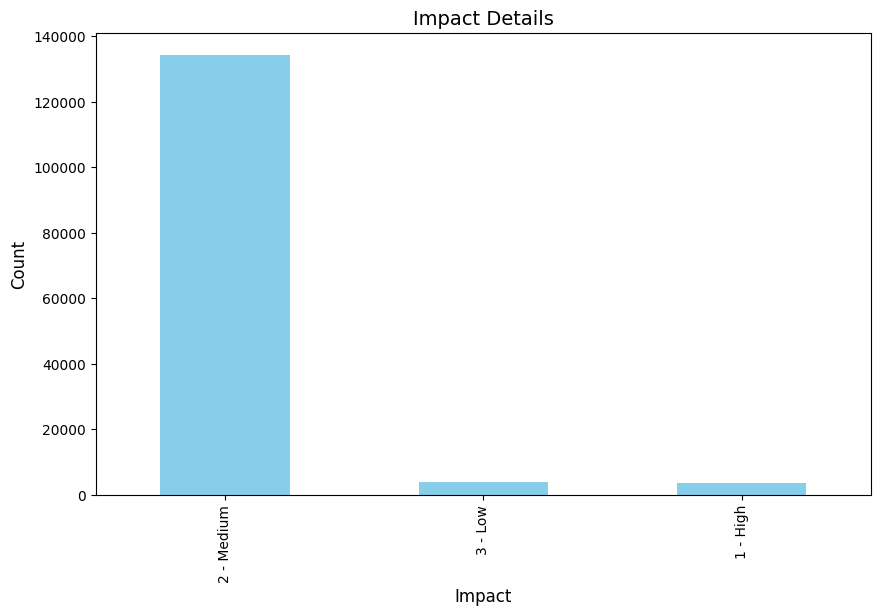

In [52]:
# Plotting the attribute 'impact'

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
impact_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Impact Details', fontsize=14)
plt.xlabel('Impact', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


urgency
2 - Medium    134089
1 - High        4020
3 - Low         3598
Name: count, dtype: int64


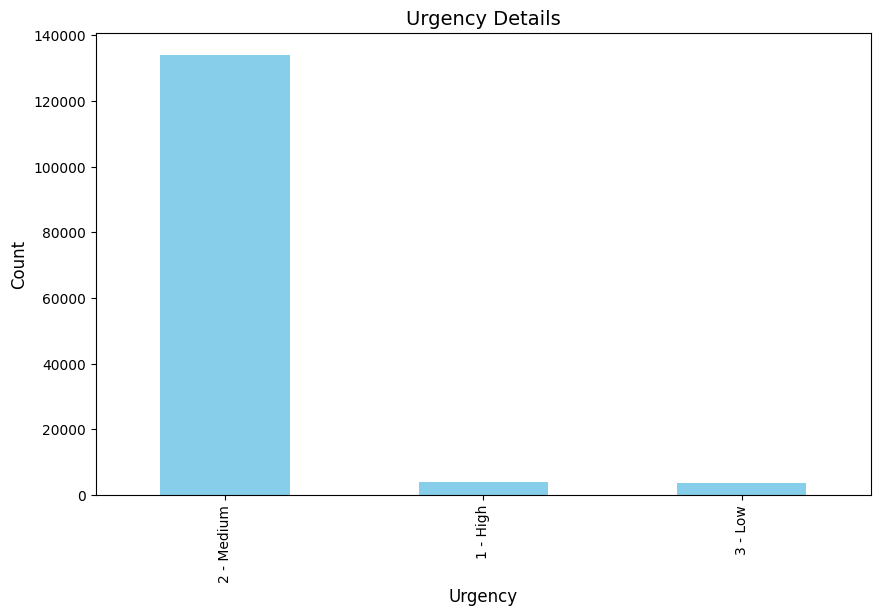

In [53]:
# validate the attribute - urgency: description of the urgency informed by the user for the incident resolution
urgency_counts = data['urgency'].value_counts()
print(urgency_counts)

# Visualization
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
urgency_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Urgency Details', fontsize=14)
plt.xlabel('Urgency', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()





Most of the incidents has been created as medium urgency

In [54]:
# validate 	priority: calculated by the system based on 'impact' and 'urgency'
priority_counts = data['priority'].value_counts()
print(priority_counts)


priority
3 - Moderate    132447
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: count, dtype: int64


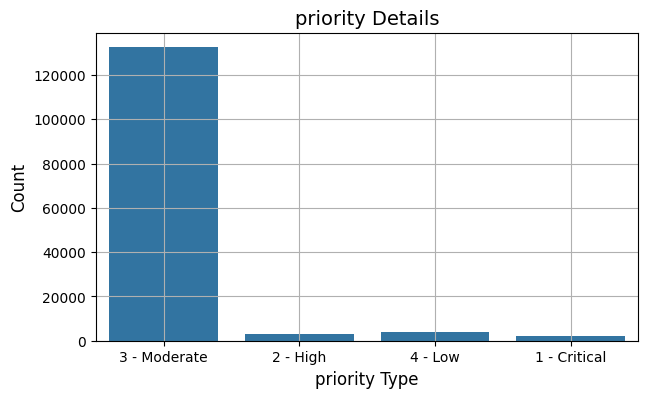

,count
priority,
3 - Moderate,132447
4 - Low,4030
2 - High,2972
1 - Critical,2258


In [55]:
# validate 	priority: calculated by the system based on 'impact' and 'urgency'

fig_dims = (7, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x =  'priority' , data = data,ax=ax)
plt.title("priority Details", size = 14)
plt.xlabel("priority Type", size=12)
plt.ylabel("Count", size=12)
#plt.xticks(rotation=90)
plt.grid()
plt.show()

# priority counts
data['priority'].value_counts()

Most of the incidents has been created as Moderate Priority

In [56]:
# validate the attribute - assignment_group: identifier of the support group in charge of the incident
assignment_group_counts = data['assignment_group'].value_counts()
print(assignment_group_counts)

assignment_group
Group 70    43474
?           14213
Group 25     7679
Group 24     6752
Group 20     6170
            ...  
Group 41        3
Group 38        2
Group 4         1
Group 11        1
Group 16        1
Name: count, Length: 79, dtype: int64


In [57]:
# drop the assignment_group feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['assignment_group'],axis=1,inplace=True)

In [58]:
# validate the attribute - assigned_to: identifier of the user in charge of the incident
assigned_to_counts = data['assigned_to'].value_counts()
print(assigned_to_counts)

assigned_to
?               27496
Resolver 17     10590
Resolver 13      8802
Resolver 194     3515
Resolver 57      3144
                ...  
Resolver 129        1
Resolver 131        1
Resolver 67         1
Resolver 146        1
Resolver 199        1
Name: count, Length: 235, dtype: int64


In [59]:
# drop the assigned_to feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['assigned_to'],axis=1,inplace=True)

In [60]:
# validate the attribute - knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident
knowledge_counts = data['knowledge'].value_counts()
print(knowledge_counts)

knowledge
False    116344
True      25363
Name: count, dtype: int64


Knowledge base document has been used for most of the cases to resolve them

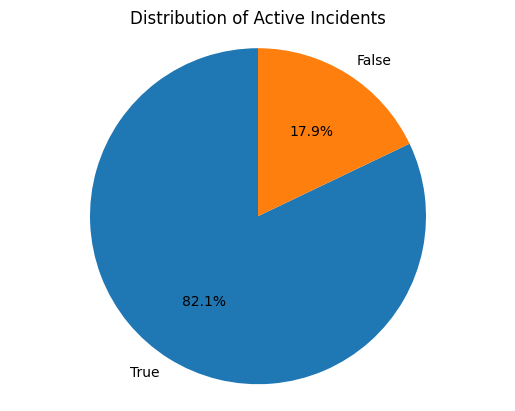

In [61]:
# Plotting the Knowldge attribue


labels = ['True', 'False']

# Create pie chart
plt.pie(knowledge_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of Active Incidents')

# Ensure circle shape
plt.axis('equal')

# Display the chart
plt.show()


u_priority_confirmation
False    100735
True      40972
Name: count, dtype: int64


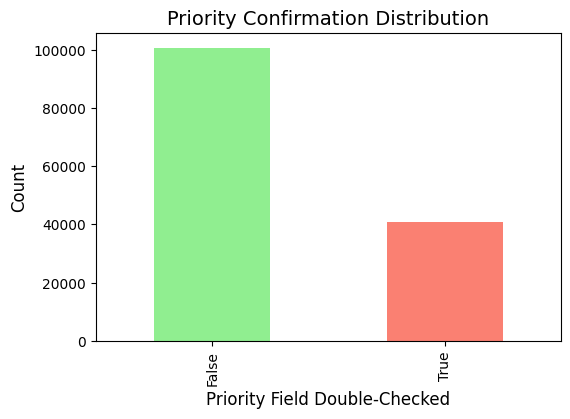

In [62]:
# validate the attribute - u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked
u_priority_confirmation_counts = data['u_priority_confirmation'].value_counts()
print(u_priority_confirmation_counts)

# Create the bar plot
plt.figure(figsize=(6, 4))
u_priority_confirmation_counts.plot(kind='bar', color=['lightgreen', 'salmon'])

# Add title and labels
plt.title('Priority Confirmation Distribution', fontsize=14)
plt.xlabel('Priority Field Double-Checked', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

In [63]:
# validate the attribute - notify: categorical attribute that shows whether notifications were generated for the incident
notify_counts = data['notify'].value_counts()
print(notify_counts)

notify
Do Not Notify    141588
Send Email          119
Name: count, dtype: int64


In [64]:
# Notifications were not generated for most of the Incidents
# drop this feature, because it has no impact on predicting the Incident resolution time
data.drop(['notify'],axis=1,inplace=True)

In [65]:
# validate closed_code: identifier of the resolution of the incident
close_code_counts = data['closed_code'].value_counts()
print(close_code_counts)

closed_code
code 6     86583
code 7     20728
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
?            714
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: count, dtype: int64


In [66]:
# drop the feature closed_code, because it has no impact on predicting the Incident resolution time
# and will not be available unless the Incident is closed
data.drop(['closed_code'],axis=1,inplace=True)

In [67]:
#validate the attribute - resolved_by: identifier of the user who resolved the incident
resolved_by_counts = data['resolved_by'].value_counts()
print(resolved_by_counts)

resolved_by
Resolved by 15     15421
Resolved by 11     12050
Resolved by 103     5360
Resolved by 177     3811
Resolved by 53      3637
                   ...  
Resolved by 222        4
Resolved by 17         4
Resolved by 185        3
Resolved by 39         3
Resolved by 48         3
Name: count, Length: 217, dtype: int64


In [68]:
# drop the feature 'resolved_by' from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['resolved_by'],axis=1,inplace=True)

In [69]:
# validate the attribute - resolved_at: incident user resolution date and time (dependent variable)
resolved_at_counts = data['resolved_at'].value_counts()
print(resolved_at_counts)

resolved_at
?                  3141
3/6/2016 16:29       93
3/6/2016 16:28       85
3/6/2016 16:27       83
3/6/2016 16:31       59
                   ... 
10/3/2016 10:01       2
9/3/2016 18:56        2
10/3/2016 12:54       2
10/3/2016 18:31       2
10/3/2016 19:16       2
Name: count, Length: 18506, dtype: int64


In [70]:
# validate the attribute - closed_at: incident user close date and time (dependent variable)
closed_at_counts = data['closed_at'].value_counts()
print(closed_at_counts)

closed_at
24/3/2016 18:59    3324
24/3/2016 18:50    2846
24/3/2016 18:40    2808
24/3/2016 19:00    2780
24/3/2016 19:01    2044
                   ... 
26/4/2016 06:07       2
5/3/2016 11:00        2
13/2/2017 06:45       2
13/2/2017 08:56       2
13/2/2017 10:33       2
Name: count, Length: 2707, dtype: int64


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141707 entries, 0 to 141711
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141707 non-null  object        
 1   incident_state           141707 non-null  object        
 2   active                   141707 non-null  bool          
 3   reassignment_count       141707 non-null  int64         
 4   reopen_count             141707 non-null  int64         
 5   sys_mod_count            141707 non-null  int64         
 6   made_sla                 141707 non-null  bool          
 7   opened_at                141707 non-null  datetime64[ns]
 8   sys_updated_at           141707 non-null  object        
 9   contact_type             141707 non-null  object        
 10  location                 141707 non-null  object        
 11  category                 141707 non-null  object        
 12  subcategory          

In [72]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'opened_at',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at'],
      dtype='object')

**Feature Engineering**

In [73]:
# # Convert time-related columns to datetime, handling invalid entries like "?"

data['opened_at'] = pd.to_datetime(data['opened_at'], errors='coerce')
data['resolved_at'] = pd.to_datetime(data['resolved_at'], errors='coerce')
data['closed_at'] = pd.to_datetime(data['closed_at'], errors='coerce')
data['sys_updated_at'] =   pd.to_datetime(data['sys_updated_at'], errors='coerce')

# Check the result to make sure conversion worked and "?" are replaced with NaT
print(data[['opened_at','resolved_at', 'closed_at','sys_updated_at']].head())

            opened_at         resolved_at           closed_at  \
0 2016-02-29 01:16:00 2016-02-29 11:29:00 2016-05-03 12:00:00   
1 2016-02-29 01:16:00 2016-02-29 11:29:00 2016-05-03 12:00:00   
2 2016-02-29 01:16:00 2016-02-29 11:29:00 2016-05-03 12:00:00   
3 2016-02-29 01:16:00 2016-02-29 11:29:00 2016-05-03 12:00:00   
4 2016-02-29 04:40:00 2016-03-01 09:52:00 2016-06-03 10:00:00   

       sys_updated_at  
0 2016-02-29 01:23:00  
1 2016-02-29 08:53:00  
2 2016-02-29 11:29:00  
3 2016-03-05 12:00:00  
4 2016-02-29 04:57:00  


In [74]:
# Identifying the missing values after the initial data clean up
# calculate % of the missing data values with '?' and calculate %

# Initialize an empty dictionary to store counts of rows with '?' for each column
question_mark_pct = {}

# Loop through each column in the DataFrame
for col in data.columns:
    # Count rows where the column contains '?'
    count_pct = (data[col] == '?').sum()/data.shape[0]*100
    # Store the count in the dictionary with the column name as the key
    question_mark_pct[col] = count_pct

# Convert the dictionary to a DataFrame
question_mark_df = pd.DataFrame(list(question_mark_pct.items()), columns=['Column', 'Percentage'])

# Sort the DataFrame by the 'Percentage' column in descending order
sorted_question_mark_df = question_mark_df.sort_values(by='Percentage', ascending=False)

# Display the sorted DataFrame
print("Percentage of rows where each column contains '?' (sorted by descending order):")
print(sorted_question_mark_df)



Percentage of rows where each column contains '?' (sorted by descending order):
                     Column  Percentage
12              subcategory    0.078331
11                 category    0.055043
10                 location    0.053632
0                    number    0.000000
3        reassignment_count    0.000000
2                    active    0.000000
1            incident_state    0.000000
4              reopen_count    0.000000
7                 opened_at    0.000000
6                  made_sla    0.000000
9              contact_type    0.000000
5             sys_mod_count    0.000000
8            sys_updated_at    0.000000
13                   impact    0.000000
14                  urgency    0.000000
15                 priority    0.000000
16                knowledge    0.000000
17  u_priority_confirmation    0.000000
18              resolved_at    0.000000
19                closed_at    0.000000


In [75]:
# Replace '?' with NaN for easier manipulation
data.replace('?', np.nan, inplace=True)

# Find columns that contain '?' (now NaN) and calculate the number of '?' in each column
columns_with_question_marks = data.columns[data.isna().any()].tolist()

# Count the number of missing ('?') values in each column
missing_values_count = data.isna().sum()

# Filter to only columns that had '?'
question_mark_columns = missing_values_count[missing_values_count > 0]

print("\nColumns with '?' and their counts:")
print(question_mark_columns)




Columns with '?' and their counts:
location          76
category          78
subcategory      111
resolved_at     3141
closed_at      85391
dtype: int64


In [76]:
# Check if any column still contains '?'
contains_question_mark = (data == '?').any().any()

# If True, print a message
if contains_question_mark:
    print("There are still some '?' values in the dataset.")
else:
    print("No '?' values found in the dataset.")

No '?' values found in the dataset.


In [77]:
# Check the columns with missing data
print(data.isnull().sum())

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
opened_at                      0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
impact                         0
urgency                        0
priority                       0
knowledge                      0
u_priority_confirmation        0
resolved_at                 3141
closed_at                  85391
dtype: int64


In [78]:
# Check the columns with missing data
print(data.isnull().sum()/data.shape[0]*100)

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
opened_at                   0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053632
category                    0.055043
subcategory                 0.078331
impact                      0.000000
urgency                     0.000000
priority                    0.000000
knowledge                   0.000000
u_priority_confirmation     0.000000
resolved_at                 2.216545
closed_at                  60.258844
dtype: float64


**Handle missing values:**

closed_at and resolved_at are important feature to predict the Incident resolution time.

closed_at and resolved_at are missing 60% (high volume) and 2% of the data respectively. These features needs to be handled by imputing with the appropriate values

We will drop rows with missing values in the other features 'location', 'category',and 'subcategory'

In [79]:
# drop rows with missing values in the other features 'location', 'category',and 'subcategory'
data = data.dropna(subset=['location', 'category', 'subcategory'])

In [80]:
# Calculate Mean Date , Median Date, Most Frequent Date for resolved_at and closed_at

# Calculate Mean Date
mean_date_resolved = data['resolved_at'].dropna().mean()
mean_date_closed = data['closed_at'].dropna().mean()

# Calculate Median Date
median_date_resolved = data['resolved_at'].dropna().median()
median_date_closed = data['closed_at'].dropna().median()

# Calculate Most Frequent Date
most_frequent_date_resolved = data['resolved_at'].mode()[0] if not data['resolved_at'].mode().empty else None
most_frequent_date_closed = data['closed_at'].mode()[0] if not data['closed_at'].mode().empty else None

# Display results
print(f"Mean Date for 'resolved_at': {mean_date_resolved}")
print(f"Mean Date for 'closed_at': {mean_date_closed}")
print(f"Median Date for 'resolved_at': {median_date_resolved}")
print(f"Median Date for 'closed_at': {median_date_closed}")
print(f"Most Frequent Date for 'resolved_at': {most_frequent_date_resolved}")
print(f"Most Frequent Date for 'closed_at': {most_frequent_date_closed}")

Mean Date for 'resolved_at': 2016-04-24 04:39:26.319172608
Mean Date for 'closed_at': 2016-06-27 12:38:10.701682432
Median Date for 'resolved_at': 2016-04-15 13:19:00
Median Date for 'closed_at': 2016-07-03 17:00:00
Most Frequent Date for 'resolved_at': 2016-06-03 16:29:00
Most Frequent Date for 'closed_at': 2016-08-06 17:07:00


In [81]:
# Impute missing values with the median date
# which is also robust and typically less affected by outliers

def impute_median_date(series):
    median_date = series.dropna().median()
    return series.fillna(median_date)

data['resolved_at'] = impute_median_date(data['resolved_at'])
data['closed_at'] = impute_median_date(data['closed_at'])

# Display the updated columns
print(data[['resolved_at', 'closed_at']].isnull().sum())

resolved_at    0
closed_at      0
dtype: int64


In [82]:
# Display the updated columns
print(data[['resolved_at', 'closed_at']].isnull())

        resolved_at  closed_at
0             False      False
1             False      False
2             False      False
3             False      False
4             False      False
...             ...        ...
141707        False      False
141708        False      False
141709        False      False
141710        False      False
141711        False      False

[141596 rows x 2 columns]


**Baseline Model:**

We'll start with a simple baseline model that predicts the mean or median closure time for every incident. This provides a reference for evaluating more complex models.

**Time-based Features:** create features based on the time differences between the incident's opening and closing times.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141596 entries, 0 to 141711
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141596 non-null  object        
 1   incident_state           141596 non-null  object        
 2   active                   141596 non-null  bool          
 3   reassignment_count       141596 non-null  int64         
 4   reopen_count             141596 non-null  int64         
 5   sys_mod_count            141596 non-null  int64         
 6   made_sla                 141596 non-null  bool          
 7   opened_at                141596 non-null  datetime64[ns]
 8   sys_updated_at           141596 non-null  datetime64[ns]
 9   contact_type             141596 non-null  object        
 10  location                 141596 non-null  object        
 11  category                 141596 non-null  object        
 12  subcategory          

**Aggregation Features:** Aggregate features based on incident states or attributes, like reassignment_count, reopen_count, etc.

In [84]:
# calculate features like total time in different statuses, reassignment counts, and other relevant metrics per incident.

# Sort data by incident and update time
data = data.sort_values(by=['number', 'sys_updated_at'])

# Calculate the time spent in each status
data['time_in_active'] = np.where(data['incident_state'] == 'Active', (data['sys_updated_at'] - data['opened_at']).dt.total_seconds() / 3600, 0)
data['time_in_resolved'] = np.where(data['incident_state'] == 'Resolved', (data['sys_updated_at'] - data['opened_at']).dt.total_seconds() / 3600, 0)
data['time_in_awaiting_user_info'] = np.where(data['incident_state'] == 'Awaiting User Info', (data['sys_updated_at'] - data['opened_at']).dt.total_seconds() / 3600, 0)




In [85]:
# Aggregate by incident number
agg_data = data.groupby('number').agg({
    'time_in_active': 'sum',
    'time_in_resolved': 'sum',
    'time_in_awaiting_user_info': 'sum',
    'reassignment_count': 'max',
    'reopen_count': 'max',
    'sys_mod_count': 'max',
    'made_sla': 'max',
    'opened_at': 'min',          # First opening time
    'closed_at': 'max'           # Final closure time (target)
}).reset_index()



In [86]:
# Calculate the total time to close the incident in days

agg_data['time_to_close'] = (agg_data['closed_at'] - agg_data['opened_at']).dt.days

# Calculate the total time to close the incident in hours
#agg_data['time_to_close'] = (agg_data['closed_at'] - agg_data['opened_at']).dt.total_seconds() / 3600

# Merge the aggregated data back into the original data
data = pd.merge(data, agg_data, on='number', how='left')


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141596 entries, 0 to 141595
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   number                        141596 non-null  object        
 1   incident_state                141596 non-null  object        
 2   active                        141596 non-null  bool          
 3   reassignment_count_x          141596 non-null  int64         
 4   reopen_count_x                141596 non-null  int64         
 5   sys_mod_count_x               141596 non-null  int64         
 6   made_sla_x                    141596 non-null  bool          
 7   opened_at_x                   141596 non-null  datetime64[ns]
 8   sys_updated_at                141596 non-null  datetime64[ns]
 9   contact_type                  141596 non-null  object        
 10  location                      141596 non-null  object        
 11  category     

In [88]:
data.head()

,number,incident_state,active,reassignment_count_x,reopen_count_x,sys_mod_count_x,made_sla_x,opened_at_x,sys_updated_at,contact_type,...,time_in_active_y,time_in_resolved_y,time_in_awaiting_user_info_y,reassignment_count_y,reopen_count_y,sys_mod_count_y,made_sla_y,opened_at_y,closed_at_y,time_to_close
0,INC0000045,New,True,0,0,0,True,2016-02-29 01:16:00,2016-02-29 01:23:00,Phone,...,0.0,17.833333,0.000000,0,0,4,True,2016-02-29 01:16:00,2016-05-03 12:00:00,64
1,INC0000045,Resolved,True,0,0,2,True,2016-02-29 01:16:00,2016-02-29 08:53:00,Phone,...,0.0,17.833333,0.000000,0,0,4,True,2016-02-29 01:16:00,2016-05-03 12:00:00,64
2,INC0000045,Resolved,True,0,0,3,True,2016-02-29 01:16:00,2016-02-29 11:29:00,Phone,...,0.0,17.833333,0.000000,0,0,4,True,2016-02-29 01:16:00,2016-05-03 12:00:00,64
3,INC0000045,Closed,False,0,0,4,True,2016-02-29 01:16:00,2016-03-05 12:00:00,Phone,...,0.0,17.833333,0.000000,0,0,4,True,2016-02-29 01:16:00,2016-05-03 12:00:00,64
4,INC0000047,New,True,0,0,0,True,2016-02-29 04:40:00,2016-02-29 04:57:00,Phone,...,44.0,29.200000,28.566667,1,0,8,True,2016-02-29 04:40:00,2016-06-03 10:00:00,95


In [89]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count_x',
       'reopen_count_x', 'sys_mod_count_x', 'made_sla_x', 'opened_at_x',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at_x', 'time_in_active_x', 'time_in_resolved_x',
       'time_in_awaiting_user_info_x', 'time_in_active_y',
       'time_in_resolved_y', 'time_in_awaiting_user_info_y',
       'reassignment_count_y', 'reopen_count_y', 'sys_mod_count_y',
       'made_sla_y', 'opened_at_y', 'closed_at_y', 'time_to_close'],
      dtype='object')

**Handlig duplicate values after aggregation:**

After aggregation, columns with the suffixes _x and _y represent duplicated features that resulted from merging or joining data.

These suffixes typically arise when performing operations like joins or merges on dataframes, and there are duplicate column names

In [90]:
columns_to_validate = ['reassignment_count_x', 'reassignment_count_y','reopen_count_x','reopen_count_y','sys_mod_count_x','sys_mod_count_y',
                       'made_sla_x', 'made_sla_y','opened_at_x','opened_at_y','closed_at_x','closed_at_y']
print(data[columns_to_validate].head())

   reassignment_count_x  reassignment_count_y  reopen_count_x  reopen_count_y  \
0                     0                     0               0               0   
1                     0                     0               0               0   
2                     0                     0               0               0   
3                     0                     0               0               0   
4                     0                     1               0               0   

   sys_mod_count_x  sys_mod_count_y  made_sla_x  made_sla_y  \
0                0                4        True        True   
1                2                4        True        True   
2                3                4        True        True   
3                4                4        True        True   
4                0                8        True        True   

          opened_at_x         opened_at_y         closed_at_x  \
0 2016-02-29 01:16:00 2016-02-29 01:16:00 2016-05-03 12:00:00   
1 20

In [91]:
print(data[columns_to_validate].isnull().sum())

reassignment_count_x    0
reassignment_count_y    0
reopen_count_x          0
reopen_count_y          0
sys_mod_count_x         0
sys_mod_count_y         0
made_sla_x              0
made_sla_y              0
opened_at_x             0
opened_at_y             0
closed_at_x             0
closed_at_y             0
dtype: int64


In [92]:
print ((data['reassignment_count_x' ].shape))
print ((data['reassignment_count_y' ].shape))
print(data[columns_to_validate].isnull().sum()/data.shape[0]*100)

(141596,)
(141596,)
reassignment_count_x    0.0
reassignment_count_y    0.0
reopen_count_x          0.0
reopen_count_y          0.0
sys_mod_count_x         0.0
sys_mod_count_y         0.0
made_sla_x              0.0
made_sla_y              0.0
opened_at_x             0.0
opened_at_y             0.0
closed_at_x             0.0
closed_at_y             0.0
dtype: float64


Columns with the suffix _x and _y typically refer to columns from the original and aggregated datasets.

You need to decide which version of these columns you want to keep based on the context of the data.

Here the columns with suffix _y has missing values, hence we keep the columns with suffix _x and drop the columns with suffix _y

In [93]:
# drop columns with suffix _y
columns_to_drop = ['reassignment_count_y','reopen_count_y','sys_mod_count_y','made_sla_y','opened_at_y','closed_at_y']
data.drop(columns=columns_to_drop, inplace=True)

In [94]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count_x',
       'reopen_count_x', 'sys_mod_count_x', 'made_sla_x', 'opened_at_x',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at_x', 'time_in_active_x', 'time_in_resolved_x',
       'time_in_awaiting_user_info_x', 'time_in_active_y',
       'time_in_resolved_y', 'time_in_awaiting_user_info_y', 'time_to_close'],
      dtype='object')

In [95]:
# drop columns with suffix _y
columns_to_drop1 = ['time_in_active_y','time_in_resolved_y','time_in_awaiting_user_info_y']
data.drop(columns=columns_to_drop1, inplace=True)

In [96]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count_x',
       'reopen_count_x', 'sys_mod_count_x', 'made_sla_x', 'opened_at_x',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at_x', 'time_in_active_x', 'time_in_resolved_x',
       'time_in_awaiting_user_info_x', 'time_to_close'],
      dtype='object')

In [97]:
# check for missing data again after data clean up
print(data.isnull().sum())

number                          0
incident_state                  0
active                          0
reassignment_count_x            0
reopen_count_x                  0
sys_mod_count_x                 0
made_sla_x                      0
opened_at_x                     0
sys_updated_at                  0
contact_type                    0
location                        0
category                        0
subcategory                     0
impact                          0
urgency                         0
priority                        0
knowledge                       0
u_priority_confirmation         0
resolved_at                     0
closed_at_x                     0
time_in_active_x                0
time_in_resolved_x              0
time_in_awaiting_user_info_x    0
time_to_close                   0
dtype: int64


In [ ]:
# Drop missing values from closed_code , resolved_by
#data = data.dropna(subset=['closed_code', 'resolved_by'])

In [98]:
## check for missing data again after data clean up
print(data.isnull().sum())

number                          0
incident_state                  0
active                          0
reassignment_count_x            0
reopen_count_x                  0
sys_mod_count_x                 0
made_sla_x                      0
opened_at_x                     0
sys_updated_at                  0
contact_type                    0
location                        0
category                        0
subcategory                     0
impact                          0
urgency                         0
priority                        0
knowledge                       0
u_priority_confirmation         0
resolved_at                     0
closed_at_x                     0
time_in_active_x                0
time_in_resolved_x              0
time_in_awaiting_user_info_x    0
time_to_close                   0
dtype: int64


In [99]:
# Remove the '_x' suffix from column names
data.columns = data.columns.str.replace('_x$', '', regex=True)

# Print the updated column names
print(data.columns)

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'opened_at',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at', 'time_in_active', 'time_in_resolved',
       'time_in_awaiting_user_info', 'time_to_close'],
      dtype='object')


**Baseline Model:**

Build a simple baseline model using DummyRegressor, that predicts the mean or median closure time for every incident.

This provides a reference for evaluating more complex models.

In [100]:
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import make_pipeline



In [101]:
#  Extract useful features from datetime columns
data['opened_at_year'] = data['opened_at'].dt.year
data['opened_at_month'] = data['opened_at'].dt.month
data['opened_at_day'] = data['opened_at'].dt.day
data['closed_at_year'] = data['closed_at'].dt.year
data['closed_at_month'] = data['closed_at'].dt.month
data['closed_at_day'] = data['closed_at'].dt.day

In [102]:
# Drop unnecessary columns like 'number', 'opened_at', 'closed_at', etc.
data.drop(columns=['number', 'opened_at', 'closed_at', 'resolved_at'], inplace=True)


In [103]:
data.drop(['sys_updated_at'],axis=1,inplace=True)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141596 entries, 0 to 141595
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   incident_state              141596 non-null  object 
 1   active                      141596 non-null  bool   
 2   reassignment_count          141596 non-null  int64  
 3   reopen_count                141596 non-null  int64  
 4   sys_mod_count               141596 non-null  int64  
 5   made_sla                    141596 non-null  bool   
 6   contact_type                141596 non-null  object 
 7   location                    141596 non-null  object 
 8   category                    141596 non-null  object 
 9   subcategory                 141596 non-null  object 
 10  impact                      141596 non-null  object 
 11  urgency                     141596 non-null  object 
 12  priority                    141596 non-null  object 
 13  knowledge     

In [105]:
# Split the data into train and test sets
X = data.drop(columns=['time_to_close'])  # Predictor features
y = data['time_to_close']  # Target variable (time to close)

In [106]:
print (X.shape)
print (y.shape)

(141596, 24)
(141596,)


In [107]:
# Since we are using a DummyRegressor, no actual features are needed, so just use empty features
X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.2, random_state=42)

In [108]:
# Ensure 'X_train' and 'X_test' are pandas DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [109]:
# encoding and transformations of the features
selector =''
selector = make_column_selector(dtype_include=object)

transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), selector),
    remainder=StandardScaler()
)


In [110]:
# Fit and Transform the data
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

print(X_train.shape)

(113276, 1)


In [111]:
# Initialize and fit the DummyRegressor (with mean strategy)
dummy_model = DummyRegressor(strategy='median')

# Fit the model (X_train is not used but passed for compatibility)
dummy_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dummy_model.predict(X_test)

# Evaluate the DummyRegressor
baseline_mae = mean_absolute_error(y_test, y_pred)
baseline_mse = mean_squared_error(y_test, y_pred)

print(f"Baseline Model - MAE: {baseline_mae}")
print(f"Baseline Model - MSE: {baseline_mse}")

Baseline Model - MAE: 52.12757768361582
Baseline Model - MSE: 5187.274187853107


**Baseline Model results Interpretation:**

***1. Mean Absolute Error (MAE): 52.12***

  MAE is the average of the absolute differences between the predicted values and the actual values. In other words, it tells you, on average, how many days the baseline prediction (median closure time) deviates from the actual closure time.

***Interpretation:***
      On average, the baseline model is off by about 38.92 days when predicting
      the incident closure time.
      The lower the MAE, the better the model, since smaller errors indicate better accuracy. For the baseline model, this value sets a benchmark for more advanced models to improve upon.

***2. Mean Squared Error (MSE): 5187.27***

MSE is the average of the squared differences between the predicted and actual values. The squaring penalizes larger errors more than smaller ones, making MSE sensitive to outliers.

***Interpretation:***
MSE is always larger than MAE because it squares the error values, which magnifies larger differences.
MSE helps to highlight cases where the baseline model makes very large errors, which might not be as obvious from the MAE alone.


In [ ]:
data.shape

**Simple Model:**

Build a simple model using Linear Regressor to predict the closure time of incidents.

This is a simple model that provides a point of comparison for more complex models, also compare with the Baseline Model

In [112]:
# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Model (Linear Regression)
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)



LinearRegression()

In [113]:
# Predict and evaluate the Linear Regression model
y_pred_simple = simple_model.predict(X_test)
simple_mae = mean_absolute_error(y_test, y_pred_simple)
simple_mse = mean_squared_error(y_test, y_pred_simple)

print(f"Simple Model (Linear Regression) - MAE: {simple_mae}")
print(f"Simple Model (Linear Regression) - MSE: {simple_mse}")

Simple Model (Linear Regression) - MAE: 39.34254300949845
Simple Model (Linear Regression) - MSE: 4400.5739056999655


In [114]:
# Comparison of the Baseline model and Simple model
improvement_mae = baseline_mae - simple_mae
improvement_mse = baseline_mse - simple_mse

print(f"Improvement in MAE: {improvement_mae}")
print(f"Improvement in MSE: {improvement_mse}")

Improvement in MAE: 12.78503467411737
Improvement in MSE: 786.7002821531414


In [ ]:
print (type (data))

**Summary on Baseline and Simple model comparision:**

The values Improvement in MAE: 12.78503467411737 and Improvement in MSE:  786.7002821531414 indicate how much better the simple model (Linear Regression) performs compared to the baseline model (Dummy Regressor) in terms of prediction accuracy.

*MAE Improvement:* The reduction of the average prediction error by 12.785 units is a substantial gain in prediction accuracy. This suggests that the simple model is significantly more reliable for day-to-day predictions compared to the baseline.

*MSE Improvement:*  A large reduction in MSE (by 786.700 units) indicates that the simple model is much better at reducing large prediction errors compared to the baseline model. This is important in cases where large errors are especially costly or undesirable.

**Conclusion:**
The improvements in both MAE and MSE show that the simple model (Linear Regression) performs much better than the baseline model (Dummy Regressor). It suggests that the Linear Regression model is more suitable for predicting the target variable (incident closure time, in this case), leading to more accurate and reliable predictions

Replaced PCA with TruncatedSVD, which works better with sparse matrices.

**Train various regression models  including:** \
Linear Regression \
Random Forest Regressor \
Gradient Boosting Regressor \
XGBoost \
Support Vector Regressor (SVR) \

In [134]:
# Ensure 'data' is a DataFrame
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)

In [135]:
# Split the data into predictors (X) and target (y)
X = data.drop(columns=['time_to_close'])
y = data['time_to_close']

In [136]:

# Create a transformer with OneHotEncoder handling unknown categories
selector = make_column_selector(dtype_include=object)

transformer = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), selector),  # Handle unknowns
    remainder=StandardScaler()
)


In [137]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Apply PCA for dimensionality reduction (retain 95% variance) with 'full' solver
#pca = PCA(n_components=0.95, svd_solver='full')

from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD for dimensionality reduction (retain 95% variance)
#svd = TruncatedSVD(n_components=100)  # You can adjust n_components based on the dataset size

Looping all the models has been taking lot to computational resources and running for ever. hence training each model individually

In [ ]:
# List of models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(),
#     "Gradient Boosting": GradientBoostingRegressor(),
#     "XGBoost": XGBRegressor(),
#     "SVR": SVR()
# }


In [139]:
from sklearn.pipeline import Pipeline

# # Loop through models and evaluate
# for model_name, model in models.items():
#     # Create a pipeline: Preprocessing -> TruncatedSVD -> Model
#     pipeline = Pipeline(steps=[
#         ('transformer', transformer),  # Apply encoding and scaling
#         ('svd', svd),                  # Apply TruncatedSVD for dimensionality reduction
#         ('model', model)               # Fit the model
#     ])


# **Linear Regression Model**

In [140]:
# model initiation

ler_model = Pipeline(steps=[
        ('transformer', transformer),
        ('svd', TruncatedSVD(n_components=100)),
        ('model', LinearRegression())
    ])


In [141]:
# Train the model
ler_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc458ccbe80>)])),
                ('svd', TruncatedSVD(n_components=100)),
                ('model', LinearRegression())])

In [148]:
  # Make predictions
y_pred = ler_model.predict(X_test)

In [151]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Store results
results_ler = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
       # 'Predictions': y_pred.tolist()  # Convert predictions to a list
    }

# Convert results to a DataFrame for easy viewing
results_ler_df = pd.DataFrame.from_dict(results_ler, orient='index')

Predictions = y_pred.tolist()  # Convert predictions to a list

# Display results
print(results_ler_df)
print (Predictions)

             0
MAE   0.391950
RMSE  0.529234
R2    0.999946
[103.80990754187962, -13.002237310982125, 72.082900530754, 80.41356032440908, 97.92587888368851, 42.84188881495763, 76.33534320242134, 117.92808252030156, -82.98379840047652, 110.8212266951978, 184.12574556537515, 82.30609127086588, 108.86739743053913, 86.30514360456347, 107.77894669706842, 43.73614493168788, 155.53541062963342, 247.00654900144957, 65.49094882015171, 99.10521792244438, -83.91258207876801, 182.2630102951743, 52.70676299996714, 110.1167202170609, 6.456881940540356, 47.12719881980229, 81.23368908626823, 116.69286508748792, 90.17543461006072, 79.31976623958691, 69.1771867459474, 47.801941483902425, 109.8669536336662, 72.2650981325582, 218.87321785870807, -12.090218213795183, 51.90151276138378, 45.80494115357018, -41.505770949511316, 75.46443453175854, -20.976590355789526, 83.23292914213584, 121.94933469122381, 154.30847691212352, 108.71893890685038, 79.31854553992775, 65.1041087468204, 126.27307256589198, 114.8372

Visualizing the Liner Regression Performance Metrics

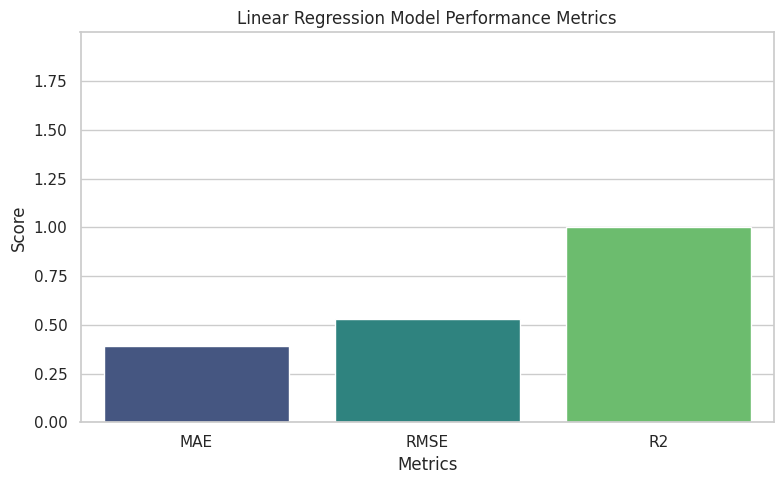

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results_ler contains the evaluation metrics for a specific model
results_ler = {
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2
}

# Convert the results_ler dictionary to a DataFrame
results_ler_df = pd.DataFrame.from_dict(results_ler, orient='index', columns=['Score'])

# Plotting
plt.figure(figsize=(8, 5))

# Bar plot for the results
sns.barplot(x=results_ler_df.index, y='Score', data=results_ler_df, palette='viridis')

# Title and labels
plt.title('Linear Regression Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, results_ler_df['Score'].max() + 1)  # Adjust y-axis limit for better visibility
plt.tight_layout()

**Explanation of the metrics from the Linear Regression model performance**

**1. Mean Absolute Error (MAE)** \
**Value: 0.391950**

***Interpretation:*** \
A lower MAE indicates better predictive accuracy. \
In this case, an MAE of 0.39 means that, on average, the predictions of the model deviate from the actual values by about 0.39 units. Given that this value is relatively small, it suggests that the model is performing well in terms of absolute errors.

**2. Root Mean Squared Error (RMSE)** \
**Value: 0.529234**

***Interpretation:*** \
Similar to MAE, a lower RMSE indicates better model performance.
An RMSE of 0.53 suggests that the model’s predictions, on average, deviate from the actual values by about 0.53 units. This is also a relatively low value, indicating that the model predictions are quite close to the actual outcomes.

***3. R-squared (R²)*** \
**Value: 0.999946** \

***Interpretation:*** \
An R² value of 0.999946 indicates that approximately 99.99% of the variance in the target variable (time to close) is explained by the model. This suggests an extremely good fit.
In practical terms, this means the model is almost perfectly predicting the target variable, with very little unexplained variance.

***Summary*** \
Overall, the metrics indicate that the Linear Regression model performs exceptionally well, with very small prediction errors (MAE and RMSE) and a very high R² value. This suggests that the model is effectively capturing the relationships in the data and making accurate predictions. \
However, it’s also essential to validate these results with cross-validation or on an independent test set to ensure that the model is not overfitting to the training data.

# **Random Forest Regressor Model**

In [156]:
# model initiation

rf_model = Pipeline(steps=[
        ('transformer', transformer),
        ('svd', TruncatedSVD(n_components=100)),
        ('model', RandomForestRegressor())
    ])



In [157]:
# Train the model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc458ccbe80>)])),
                ('svd', TruncatedSVD(n_components=100)),
                ('model', RandomForestRegressor())])

In [159]:
  # Make predictions
y_pred = rf_model.predict(X_test)

In [160]:
# Calculate evaluation metrics
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_r2 = r2_score(y_test, y_pred)

# Store results
results_rf = {
        'MAE': rf_mae,
        'RMSE': rf_rmse,
        'R2': rf_r2,
       # 'Predictions': y_pred.tolist()  # Convert predictions to a list
    }

# Convert results to a DataFrame for easy viewing
results_rf_df = pd.DataFrame.from_dict(results_rf, orient='index')

Predictions_rf = y_pred.tolist()  # Convert predictions to a list

# Display results
print(results_rf_df)
print (Predictions_rf)

             0
MAE   1.499185
RMSE  5.546661
R2    0.994063
[101.82, -13.76, 72.86, 80.0, 98.52, 42.59, 75.63, 117.96, -81.63, 111.0, 182.72, 82.0, 108.97, 85.73, 107.99, 44.11, 153.57, 232.53, 65.83, 107.51, -81.13, 182.01, 53.55, 110.0, 6.19, 47.82, 80.93, 116.95, 89.07, 78.94, 69.0, 47.5345, 110.12, 71.92, 219.9, -12.64, 51.31, 46.11, -28.86, 74.88, -6.98, 83.16, 122.03, 154.92, 108.71, 76.48, 63.47, 125.0, 115.0, 85.0, 183.01, 117.0, 81.98, 85.95, 113.99, 85.91, -102.55, 122.73, 47.97, 33.0, 82.88, -23.91, 156.81, 110.71, 183.27, 116.04, 52.0, 240.86, 122.94666666666666, 113.94, 38.89, 88.89, 86.95, 41.1, 33.95, 110.995, 95.89, 5.0, 102.81000000000002, 78.98, 87.97, 80.955, 92.6, 107.96, 158.17, 212.0, 109.98, 73.88, 114.0, 94.06, 166.09, 110.0, 99.63, -95.83, 40.487500000000004, 52.94, 80.99, 184.64, 60.18, 210.59, 111.04666666666667, 52.01, -34.97, 253.91, 232.32, -45.77, 52.98, 129.02, 107.87, 38.96, -51.36, 113.29, 215.6525, 88.94, 81.16, 47.66333333333334, 75.95, 79.885, 46.13

Visualizing the Random Forest Regression performance Metriecs

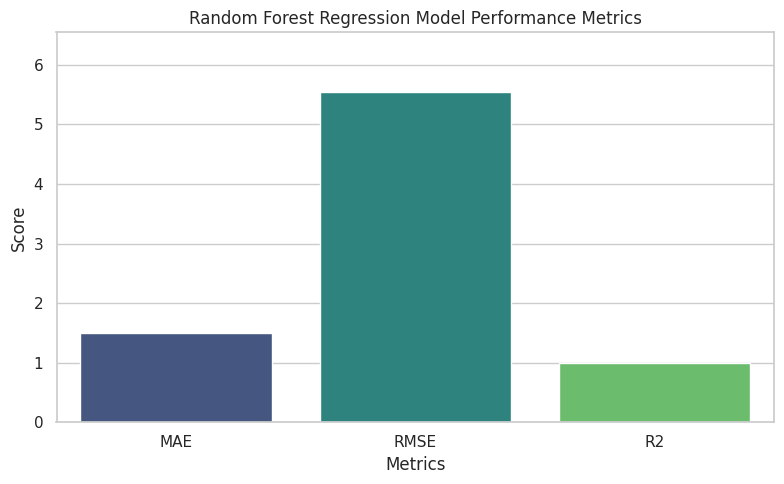

In [161]:
# Convert the results dictionary to a DataFrame
results_rf_df = pd.DataFrame.from_dict(results_rf, orient='index', columns=['Score'])

# Plotting
plt.figure(figsize=(8, 5))

# Bar plot for the results
sns.barplot(x=results_rf_df.index, y='Score', data=results_rf_df, palette='viridis')

# Title and labels
plt.title('Random Forest Regression Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, results_rf_df['Score'].max() + 1)  # Adjust y-axis limit for better visibility
plt.tight_layout()

# Show plot
plt.show()

**Explanation of the metrics from the Random Forest Regression model performance**

**1. Mean Absolute Error (MAE)** \
**Value: 1.499185** \
***Interpretation:*** \
A MAE of 1.50 means that, on average, the predictions made by the model are about 1.50 units away from the actual values.
This value indicates a relatively moderate level of error. While it’s larger than the MAE for your Linear Regression model (which was about 0.39), it still shows that the model can predict reasonably well.

**2. Root Mean Squared Error (RMSE)** \
**Value: 5.546661** \
***Interpretation:*** \
An RMSE of 5.55 suggests that, on average, the predictions deviate from the actual values by about 5.55 units.
This value is substantially larger than the RMSE from the Linear Regression model (which was about 0.53), indicating that there are larger errors in the predictions. \
This could be due to the complexity of the data or the model not capturing certain patterns as effectively as the Linear Regression model.

**3. R-squared (R²)** \
**Value: 0.994063** \
***Interpretation:*** \
An R² value of 0.994063 means that approximately 99.41% of the variance in the target variable (time to close) is explained by the Random Forest model.
This is an excellent fit, indicating that the model effectively captures the underlying relationships in the data, although slightly less than the R² value of the Linear Regression model (which was about 99.99%).

**Summary** \
Overall, the Random Forest Regression model shows strong performance, with a high R² value indicating that it explains a significant amount of variance in the target variable. However, the MAE and RMSE values are noticeably larger than those of the Linear Regression model, suggesting that while the Random Forest model captures the majority of the data's structure, it might not be as consistent in making accurate predictions.

This difference in performance metrics can also imply that the model might be more sensitive to specific patterns in the data or that it could benefit from further tuning or feature engineering to improve prediction accuracy. it’s essential to validate these results with cross-validation or test on unseen data to assess the model's generalization capability.

# **XGBoost  Regressor Model**

In [162]:
import xgboost as xgb

In [163]:
# model initiation

xgb_model = Pipeline(steps=[
        ('transformer', transformer),
        ('svd', TruncatedSVD(n_components=100)),
        ('model', xgb.XGBRegressor())
    ])



In [164]:
# Train the model
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc458ccbe80>)])),
                ('svd', TruncatedSVD(n_components=100)),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              c...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [165]:
  # Make predictions
y_pred = rf_model.predict(X_test)

In [166]:
# Calculate evaluation metrics
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_r2 = r2_score(y_test, y_pred)

# Store results
results_xgb = {
        'MAE': xgb_mae,
        'RMSE': xgb_rmse,
        'R2': xgb_r2,
       # 'Predictions': y_pred.tolist()  # Convert predictions to a list
    }

# Convert results to a DataFrame for easy viewing
results_xgb_df = pd.DataFrame.from_dict(results_xgb, orient='index')

Predictions_xgb = y_pred.tolist()  # Convert predictions to a list

# Display results
print(results_xgb_df)
print (Predictions_xgb)

             0
MAE   1.499185
RMSE  5.546661
R2    0.994063
[101.82, -13.76, 72.86, 80.0, 98.52, 42.59, 75.63, 117.96, -81.63, 111.0, 182.72, 82.0, 108.97, 85.73, 107.99, 44.11, 153.57, 232.53, 65.83, 107.51, -81.13, 182.01, 53.55, 110.0, 6.19, 47.82, 80.93, 116.95, 89.07, 78.94, 69.0, 47.5345, 110.12, 71.92, 219.9, -12.64, 51.31, 46.11, -28.86, 74.88, -6.98, 83.16, 122.03, 154.92, 108.71, 76.48, 63.47, 125.0, 115.0, 85.0, 183.01, 117.0, 81.98, 85.95, 113.99, 85.91, -102.55, 122.73, 47.97, 33.0, 82.88, -23.91, 156.81, 110.71, 183.27, 116.04, 52.0, 240.86, 122.94666666666666, 113.94, 38.89, 88.89, 86.95, 41.1, 33.95, 110.995, 95.89, 5.0, 102.81000000000002, 78.98, 87.97, 80.955, 92.6, 107.96, 158.17, 212.0, 109.98, 73.88, 114.0, 94.06, 166.09, 110.0, 99.63, -95.83, 40.487500000000004, 52.94, 80.99, 184.64, 60.18, 210.59, 111.04666666666667, 52.01, -34.97, 253.91, 232.32, -45.77, 52.98, 129.02, 107.87, 38.96, -51.36, 113.29, 215.6525, 88.94, 81.16, 47.66333333333334, 75.95, 79.885, 46.13

Visualizing the XGBoost model performance Metriecs

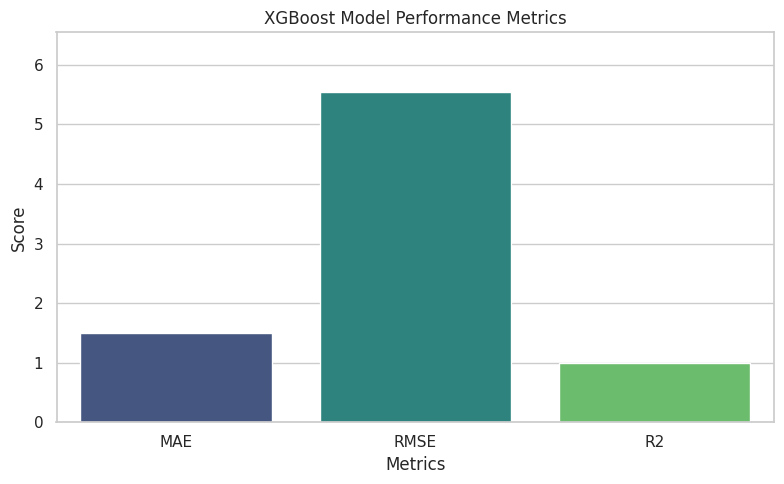

In [167]:
# Convert the results dictionary to a DataFrame
results_xgb_df = pd.DataFrame.from_dict(results_xgb, orient='index', columns=['Score'])

# Plotting
plt.figure(figsize=(8, 5))

# Bar plot for the results
sns.barplot(x=results_xgb_df.index, y='Score', data=results_xgb_df, palette='viridis')

# Title and labels
plt.title('XGBoost Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, results_xgb_df['Score'].max() + 1)  # Adjust y-axis limit for better visibility
plt.tight_layout()

# Show plot
plt.show()

** Interpretation of the performance metrics for the XGBoost model **

**1. Mean Absolute Error (MAE)** \
**Value: 1.499185** \
***Interpretation:***
A MAE of 1.50 means that, on average, the predictions of the XGBoost model deviate from the actual values by about 1.50 units.
This value indicates that the model is reasonably accurate, though it is larger than the MAE for the Linear Regression model (which was about 0.39) and the same as that of the Random Forest model. This suggests that while XGBoost is effective, it has similar prediction error characteristics as the Random Forest model in this context.

**2. Root Mean Squared Error (RMSE)** \
**Value: 5.546661**
***Interpretation:***
An RMSE of 5.55 suggests that, on average, the predictions deviate from the actual values by about 5.55 units.
This value is quite large compared to the RMSE from the Linear Regression model (which was about 0.53) and indicates that there may be larger errors in the predictions. This suggests that while the model captures some patterns, there might be instances where the predictions significantly miss the actual values.

**3. R-squared (R²)** \
**Value: 0.994063** \
***Interpretation:***
An R² value of 0.994063 means that approximately 99.41% of the variance in the target variable (time to close) is explained by the XGBoost model.
This indicates an excellent fit, suggesting that the model effectively captures the underlying relationships in the data, similar to the Random Forest model. Although it is slightly less than the R² value for the Linear Regression model (which was 0.999946), it still demonstrates a very high explanatory power.

**Summary**
Overall, the XGBoost model demonstrates strong performance with a high R² value, indicating that it explains a significant portion of the variance in the target variable. However, the MAE and RMSE values indicate that there are notable prediction errors compared to other models, particularly Linear Regression.

In practice, while the high R² suggests that the model is capturing the main trends in the data, the higher MAE and RMSE indicate that there may be specific instances where the predictions are off significantly. This could be due to the model being overly complex or not capturing certain features effectively.

# **Compare the performance of the Linear Regression , Random Forest and XGBoost Models**

In [168]:
# Define the performance metrics for each model
perf_results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [0.391950, 1.499185, 1.499185],
    'RMSE': [0.529234, 5.546661, 5.546661],
    'R2': [0.999946, 0.994063, 0.994063]
}

# Create a DataFrame from the results dictionary
perf_results_df = pd.DataFrame(perf_results)

# Display the consolidated DataFrame
print(perf_results_df)

               Model       MAE      RMSE        R2
0  Linear Regression  0.391950  0.529234  0.999946
1      Random Forest  1.499185  5.546661  0.994063
2            XGBoost  1.499185  5.546661  0.994063


**Visualize and compare the performance metrics (MAE, RMSE, and R²) of the three regression models**

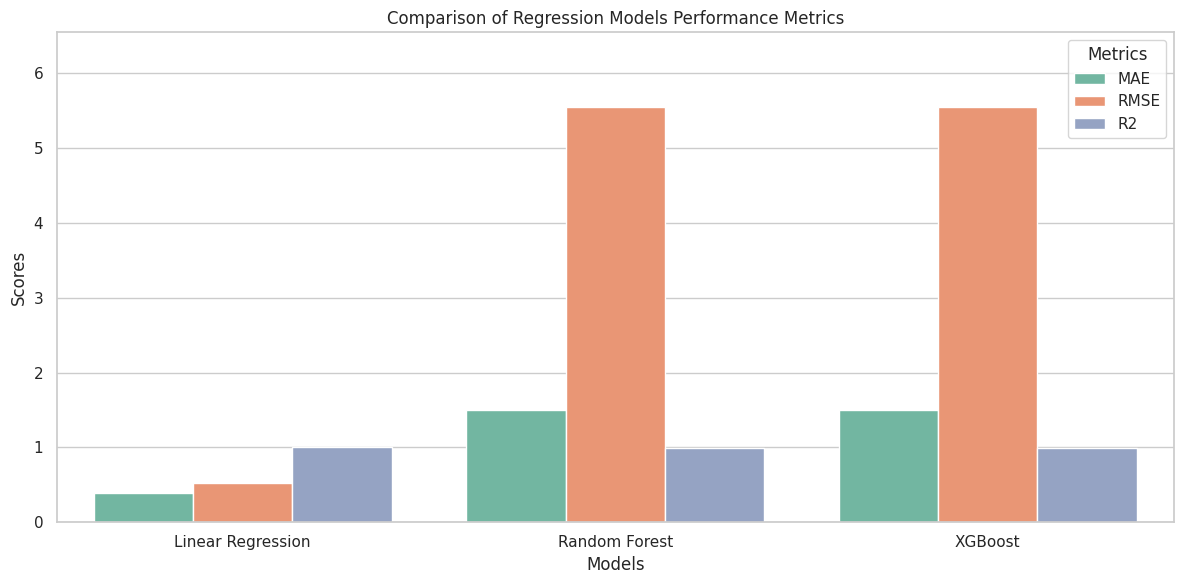

In [169]:
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(perf_results_df)

# Melt the DataFrame to have a long format suitable for seaborn
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='Set2')

# Set plot title and labels
plt.title('Comparison of Regression Models Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, max(results_df['MAE'].max(), results_df['RMSE'].max(), results_df['R2'].max()) + 1)

# Display the legend
plt.legend(title='Metrics')

# Show the plot
plt.tight_layout()
plt.show()

# **Summary**

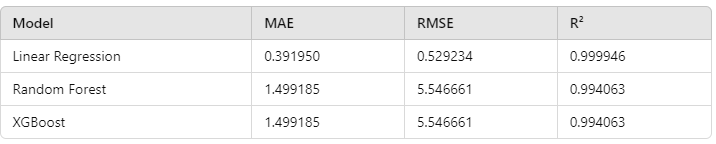

# **Model Comparison**

*   **Linear Regression** outperforms both **Random Forest** and **XGBoost** in terms of MAE and RMSE, indicating that it has the lowest average prediction error and variance in errors. This suggests that Linear Regression is well-suited for the data characteristics in this case.
*  **Random Forest** and **XGBoost** show the same performance in MAE and RMSE, which are considerably higher than those of Linear Regression. While they explain a very high proportion of the variance (similar R² values), they exhibit larger errors in their predictions. This suggests that these models might be overly complex for the given data or not capturing certain relationships as well as Linear Regression.




# **Considerations**


*   The very high R² of Linear Regression suggests that it is the most suitable model for this dataset. However, the significant RMSE of the other two models indicates that they might be better suited for different types of problems or datasets, particularly where non-linear relationships are more pronounced.
*   It might be beneficial to perform model tuning (hyperparameter optimization) for Random Forest and XGBoost to improve their performance metrics, as they both have potential given their capabilities in capturing complex patterns.
* Additionally, analyzing residuals and exploring feature importance could provide insights into improving predictions for Random Forest and XGBoost.




# **Hyperparameter Tuning for XGBoost**
To improve the performance of the XGBoost model, we can perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV. \
Here we used RandomizedSearchCV, using its native categorical support (enable_categorical=True),for tuning the most important hyperparameters of the XGBoost model.

In [170]:
from sklearn.model_selection import RandomizedSearchCV

In [175]:
# Define the categorical columns
categorical_columns = ['incident_state', 'contact_type', 'location', 'category', 'subcategory', 'impact', 'urgency', 'priority']


In [176]:
# Ensure categorical columns are of 'category' type
X[categorical_columns] = X[categorical_columns].astype('category')

In [177]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

In [179]:
# Instantiate XGBoost with categorical support
xgb_model = xgb.XGBRegressor(
    enable_categorical=True,
    random_state=42,
    tree_method='hist'  # Use efficient histogram-based tree building
)

In [180]:
# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',  # You can use 'r2', 'neg_mean_absolute_error', etc.
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all cores for parallelization
    random_state=42
)


In [181]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=N...
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [183]:
# Use the best estimator for predictions
best_xgb_model = random_search.best_estimator_

In [186]:
print (best_xgb_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [184]:
# Make predictions
y_pred = best_xgb_model.predict(X_test)

In [185]:
# Evaluate the tuned model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 0.1798496153722596
RMSE: 0.8350507803849263
R2: 0.9998654127120972


**Performance Metrics (After XGBoost Hyperparameter Tuning)** \
The performance metrics after XGBoost hyperparameter tuning demonstrate a significant improvement in the model's predictive accuracy.

**MAE (Mean Absolute Error): 0.1798** \
A MAE of 0.1798 suggests that, on average, the model’s predictions are off by 0.18 units from the actual values.
This low MAE indicates very accurate predictions, implying that the model’s errors are small and close to the true values of the target variable (time to closure). \
**RMSE (Root Mean Squared Error): 0.8351** \
An RMSE of 0.8351 indicates that the model's predictions have a low level of variance from the actual values. \
RMSE penalizes larger errors more heavily than MAE, so having a low RMSE further confirms that the model produces accurate and consistent predictions with minimal large errors. \
**R² (Coefficient of Determination): 0.9999** \
An R² of 0.9999 means that 99.99% of the variance in the data is explained by the model. \
This is an extremely high value, suggesting that the tuned XGBoost model fits the data almost perfectly, capturing nearly all of the patterns and variability in the dataset.

**Comparison to Previous Models:**

*  The **MAE** has dropped significantly from earlier values (e.g., 1.499 in the untuned XGBoost and Random Forest), indicating a much more accurate model.
*  The **RMSE** has also decreased dramatically from previous models (previously around 5.5), which means the overall error distribution is much smaller.
*  The **R²** value has improved from 0.994 to 0.9999, indicating that the model is now explaining nearly all the variability in the dataset.



**Overall Conclusion:**\
The tuned XGBoost model performs exceptionally well, with minimal prediction error (as seen in the low MAE and RMSE) and an almost perfect fit (R² = 0.9999).\
This suggests that the model has learned the underlying patterns in the data very effectively.\
However, while these metrics indicate a strong model, the extremely high R² score might warrant checking the model’s performance on unseen data (validation or test data) to ensure that it is not overfitting. If the model generalizes well, it would be highly suitable for deployment.

# **Further validation and tuning of the XGBoost model**

**Cross-validation:** \
Use **K-Fold Cross-Validation** to assess model performance on different subsets of the data and prevent overfitting. This will provide a more robust evaluation compared to a simple train-test split.

In [187]:
# Implement K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score, KFold

# Define KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Apply cross-validation to the tuned model (used best_xgb_model from previously hypertuned )
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

# Print Cross-Validation results
print("Cross-Validation MAE Scores: ", -cv_scores)
print("Mean MAE: ", -cv_scores.mean())

Cross-Validation MAE Scores:  [0.1864127  0.18231952 0.19830909 0.18905416 0.2025362 ]
Mean MAE:  0.1917263350031033


**Perform Grid Search for Further Tuning** \
 Further optimize the model by tuning key hyperparameters using the Grid Search

In [188]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model with enable_categorical=True
xgb_model2 = xgb.XGBRegressor(objective='reg:squarederror', enable_categorical=True, random_state=42)


In [189]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model2, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=1)

In [190]:
# Get the best parameters and performance
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 1.0}


In [191]:
# Evaluate best model on test data
best_xgb_model2 = grid_search.best_estimator_
y_pred_best = best_xgb_model2.predict(X_test)

**Evaluate and Compare Performance**

In [192]:
# Calculate performance metrics for the tuned XGBoost model
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

# Print the final tuned model's performance
print("Tuned XGBoost MAE: ", mae_best)
print("Tuned XGBoost RMSE: ", rmse_best)
print("Tuned XGBoost R2: ", r2_best)

Tuned XGBoost MAE:  0.1352196972458071
Tuned XGBoost RMSE:  0.7738481395427997
Tuned XGBoost R2:  0.9998844265937805


**Comparison with Other Models**

Add the Hyper Tuned XGBoost perforamce metrics to the metrics dataset

In [202]:
# Define the performance metrics for each model
results_df = {
    'Model': ['Linear Regression', 'Random Forest', ' Original XGBoost','1st Tuned XGBoost','2nd Tuned XGBoost'],
    'MAE':   [0.391950, 1.499185, 1.499185, 0.1798496153722596, 0.1352196972458071],
    'RMSE': [0.529234, 5.546661, 5.546661, 0.8350507803849263,  0.7738481395427997],
    'R2': [0.999946, 0.994063, 0.994063, 0.9998654127120972, 0.9998844265937805  ]
}

results_df = pd.DataFrame(results_df)


In [204]:
print (results_df)

               Model       MAE      RMSE        R2
0  Linear Regression  0.391950  0.529234  0.999946
1      Random Forest  1.499185  5.546661  0.994063
2   Original XGBoost  1.499185  5.546661  0.994063
3  1st Tuned XGBoost  0.179850  0.835051  0.999865
4  2nd Tuned XGBoost  0.135220  0.773848  0.999884


Visualizing the final metrics and compare the models

# **Interpretation of Performance Metrics**

**1. Mean Absolute Error (MAE):**

* **Linear Regression:** MAE of 0.391950 indicates an average error of about 0.39 time units in predicting the closure time.
* **Random Forest & Original XGBoost:** Both have a significantly higher MAE of 1.499185, showing that these models have a larger average prediction error compared to Linear Regression.
* **1st Tuned XGBoost:** The MAE improves drastically to 0.179850, indicating much better performance in predicting the target variable.
* 2nd Tuned XGBoost: **bold text** Further tuning leads to an even lower MAE of 0.135220, suggesting excellent predictive capability.

**2. Root Mean Squared Error (RMSE):**

* **Linear Regression:** RMSE of 0.529234 suggests that the model has a reasonable level of prediction error, but it's higher than the tuned XGBoost models.
* **Random Forest & Original XGBoost:** With an RMSE of 5.546661, both models are performing poorly in terms of prediction accuracy compared to Linear Regression and tuned XGBoost models.
* 1st Tuned XGBoost: **bold text**  The RMSE is significantly lower at 0.835051, indicating that the model is predicting closer to the actual values on average.
* **2nd Tuned XGBoost:** The RMSE improves further to 0.773848, showing a refined predictive performance after tuning.

**3. R-squared (R²):**

* **Linear Regression:** An R² value of 0.999946 indicates that the model explains approximately 99.99% of the variance in the target variable, which is excellent.
* **Random Forest & Original XGBoost:**  With an R² value of 0.994063, these models explain about 99.41% of the variance, which is still strong but not as effective as Linear Regression.
* **1st Tuned XGBoost:** R² increases to 0.999865, indicating a substantial improvement and better fit compared to the original XGBoost and Random Forest.
* **2nd Tuned XGBoost:**  Further improvement in R² to 0.999884 shows that the model fits the data exceptionally well, explaining even more variance.




# **Summary of Comparisons**

* **Tuned XGBoost** models outperform both the Linear Regression and the Random Forest models in all three metrics. The first tuned model already shows remarkable improvement, while the second tuning phase further enhances the performance.
* **Linear Regression** remains competitive with an excellent R² score, but the tuned XGBoost models achieve lower MAE and RMSE, indicating superior prediction accuracy.
* **Random Forest and Original XGBoost** do not perform well in comparison to the other models, as reflected by their high MAE and RMSE scores.

**Conclusion**

The tuning process for the XGBoost model has led to significant improvements in performance metrics, demonstrating its flexibility and capability to provide highly accurate predictions when hyperparameters are optimized. The performance of the tuned XGBoost models, especially the second tuning, suggests they are well-suited for this prediction task. This result emphasizes the importance of hyperparameter tuning in machine learning workflows to achieve optimal model performance.

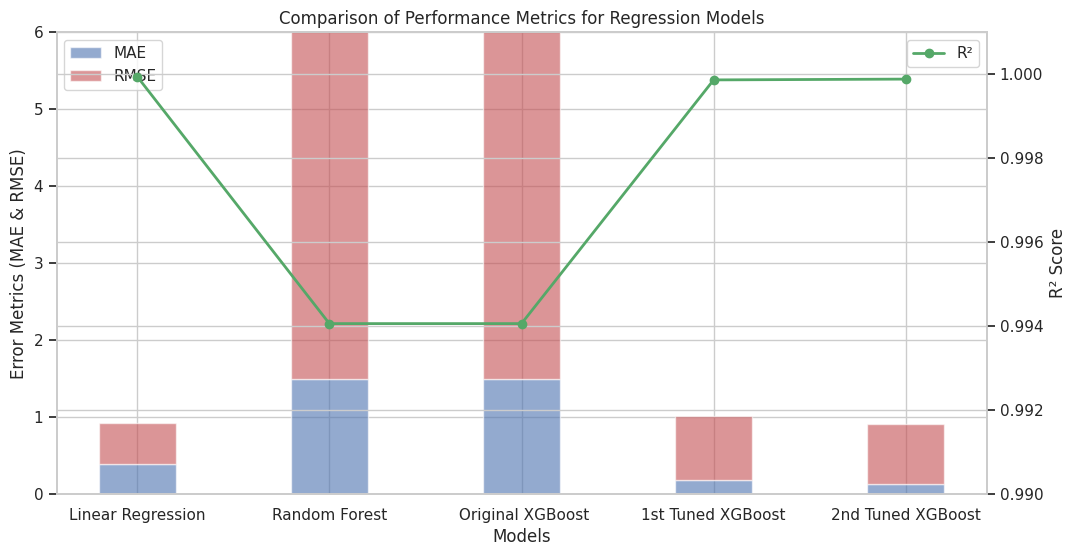

In [208]:
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MAE and RMSE
ax1.bar(results_df['Model'], results_df['MAE'], width=0.4, label='MAE', color='b', alpha=0.6)
ax1.bar(results_df['Model'], results_df['RMSE'], width=0.4, label='RMSE', color='r', alpha=0.6, bottom=results_df['MAE'])

# Create a second y-axis for R²
ax2 = ax1.twinx()
ax2.plot(results_df['Model'], results_df['R2'], color='g', marker='o', label='R²', linewidth=2)

# Labeling
ax1.set_xlabel('Models')
ax1.set_ylabel('Error Metrics (MAE & RMSE)')
ax2.set_ylabel('R² Score')
ax1.set_title('Comparison of Performance Metrics for Regression Models')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set y-axis limits
ax1.set_ylim(0, 6)  # MAE and RMSE
ax2.set_ylim(0.99, 1.001)  # R²

plt.show()

**Interpretation of the Plot**

**MAE and RMSE:** \

*   The blue bars represent the Mean Absolute Error (MAE), while the red bars stacked on top represent the Root Mean Squared Error (RMSE).
*   Both 1st Tuned XGBoost and 2nd Tuned XGBoost have significantly lower MAE and RMSE compared to Linear Regression, Random Forest, and Original XGBoost.
*  The Random Forest and Original XGBoost show very high error values, indicating poorer predictive performance.

**R² Score:**

The green line represents the R² score for each model, plotted on the secondary

*   The green line represents the R² score for each model, plotted on the secondary y-axis
*  All models except for the Random Forest and Original XGBoost have very high R² values, close to 1, which indicates a good fit
*  The 1st Tuned XGBoost and 2nd Tuned XGBoost perform exceptionally well, explaining almost all of the variance in the target variable.

**Conclusion**

The plot clearly demonstrates the superior performance of the tuned XGBoost models compared to the other models, as reflected in their lower error metrics (MAE and RMSE) and higher R² scores. This visual comparison reinforces the effectiveness of hyperparameter tuning in improving model accuracy.

Analyzing residuals and exploring feature importance are essential steps in understanding your regression model's performance and identifying areas for improvement.

**Analyzing Residuals** \
Residuals are the differences between the observed values and the predicted values. Analyzing these can help identify patterns or systematic errors in the model.

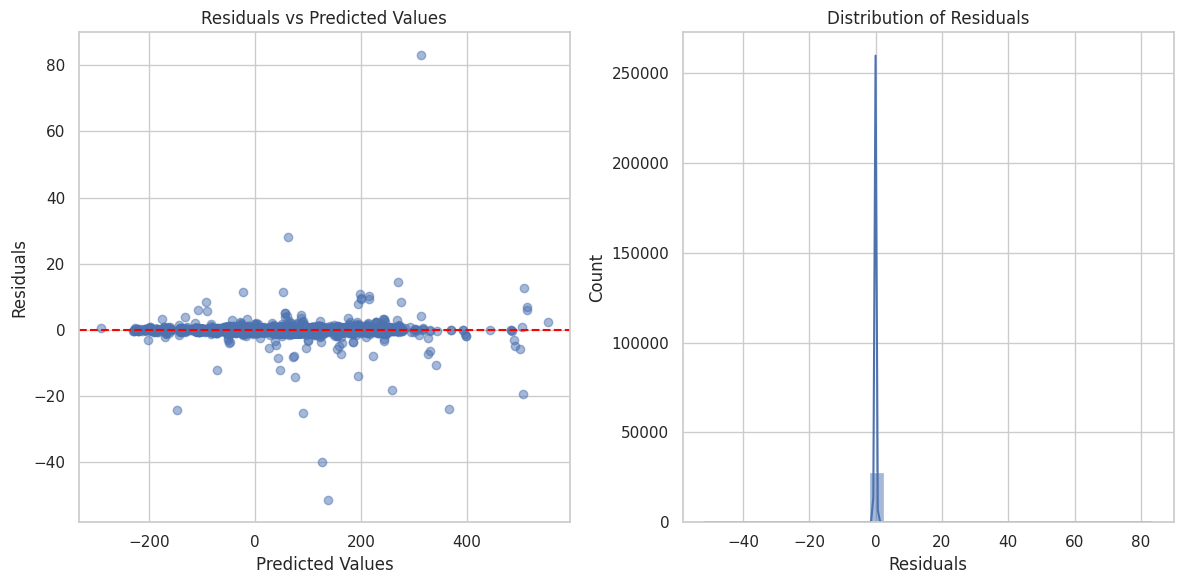

In [209]:
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Histogram of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

**Exploring Feature Importance**

Feature importance helps you understand which features contribute most to the predictions made by your model. This can guide feature selection and engineering efforts.

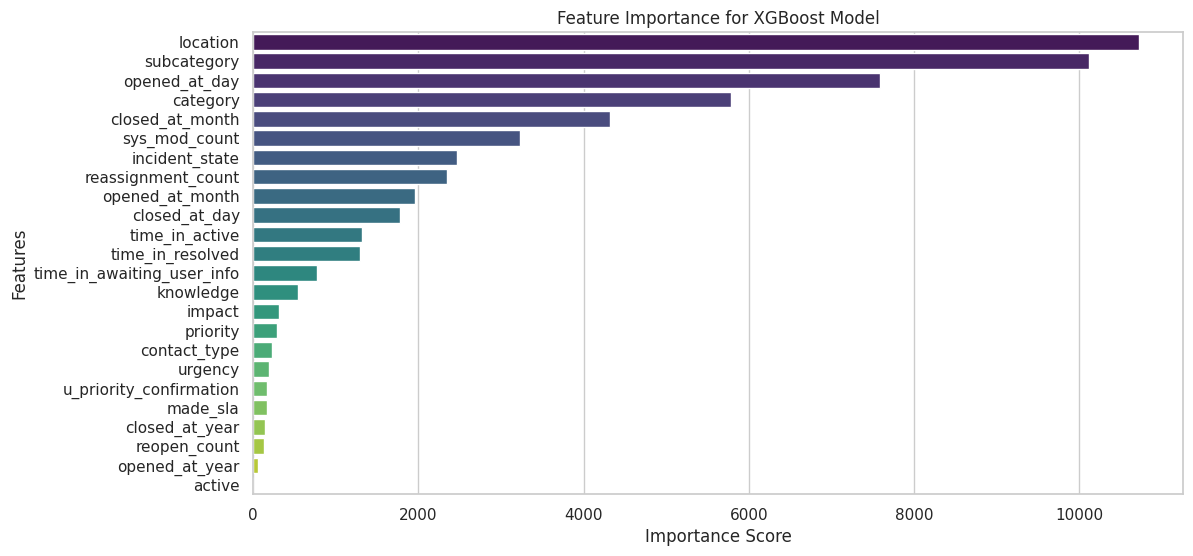

In [210]:
# `best_xgb_model2` is  trained XGBoost model
# For an XGBoost model, you can get the importance
importance = best_xgb_model2.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for easier plotting
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [211]:
print (importance_df)

                       Feature  Importance
7                     location     10719.0
9                  subcategory     10115.0
20               opened_at_day      7585.0
8                     category      5782.0
22             closed_at_month      4316.0
4                sys_mod_count      3230.0
0               incident_state      2464.0
2           reassignment_count      2342.0
19             opened_at_month      1964.0
23               closed_at_day      1782.0
15              time_in_active      1325.0
16            time_in_resolved      1293.0
17  time_in_awaiting_user_info       780.0
13                   knowledge       542.0
10                      impact       313.0
12                    priority       296.0
6                 contact_type       227.0
11                     urgency       192.0
14     u_priority_confirmation       173.0
5                     made_sla       170.0
21              closed_at_year       140.0
3                 reopen_count       137.0
18         

**Convert feature importance scores into percentages**

In [212]:
# Calculate total importance
total_importance = importance_df['Importance'].sum()

# Convert to percentage
importance_df['Importance (%)'] = (importance_df['Importance'] / total_importance) * 100

# Sort by Importance (%)
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False)

# Display results
print(importance_df)

                       Feature  Importance  Importance (%)
7                     location     10719.0       19.159889
9                  subcategory     10115.0       18.080257
20               opened_at_day      7585.0       13.557959
8                     category      5782.0       10.335151
22             closed_at_month      4316.0        7.714720
4                sys_mod_count      3230.0        5.773528
0               incident_state      2464.0        4.404326
2           reassignment_count      2342.0        4.186254
19             opened_at_month      1964.0        3.510591
23               closed_at_day      1782.0        3.185271
15              time_in_active      1325.0        2.368398
16            time_in_resolved      1293.0        2.311198
17  time_in_awaiting_user_info       780.0        1.394226
13                   knowledge       542.0        0.968809
10                      impact       313.0        0.559478
12                    priority       296.0        0.5290

# **Interpretation of Feature Importance**

**1. Location (Importance: 19.15%):** \
If location accounts for 19.15%, it indicates that geographical factors significantly influence incident closure times, suggesting resource allocation might be optimized based on location.\

**2. Subcategory (Importance: 18.08%):**
If subcategory contributes 18.08%, this reinforces the idea that the specific nature of the incident impacts resolution time. Focusing on these subcategories can lead to improved efficiency. \

**3. Opened at Day (Importance: 13.55%):**
A percentage of 13.55% might suggest that the day of the week plays a crucial role in closure times, indicating possible operational adjustments during busy days.

**4. Category (Importance: 10.33%):** **bold text**
If category accounts for 10%, it confirms that the type of incident also matters. Higher scores for specific categories can guide training and resource distribution.

**5. Closed at Month (Importance: 7.71%):**
An influence of 7.71% may suggest seasonal trends in incident resolution. Understanding these patterns can help in planning resources during peak months.
Other Features:

As you move down the list, lower percentages (e.g., 3% for knowledge) still contribute but may be less impactful than the higher-ranking features. However, these features could still provide insights or context that might be relevant in specific scenarios.

**Summary**

By converting feature importance scores into percentages, you gain a clearer understanding of how each feature contributes to the predictions. This helps in making data-driven decisions regarding feature selection, engineering, and potentially identifying features that may need more attention in operational strategies. \

This also allows for prioritizing which features to focus on for future model improvements or in-depth analyses, ultimately leading to better model performance and more efficient incident management processes.